<a href="https://colab.research.google.com/github/assoumaaa/Predicting-Spotify-Top-Tier-Songs/blob/main/Spotify79.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Spotify - Group 79]

##Group Members:

<ul type="none">
  <li>Omar Assouma<li>
  <li>Victor Taiwo<li>
</ul>


In [ ]:
from google.colab import drive
drive.mount ("./drive", force_remount = True)

path_prefix = "./drive/My Drive"

Mounted at ./drive


## Introduction

<font color="black">
We are using data set provided from Kaggle to analyze Spotify songs with respect to their features and genres. This is analyzed through multiple steps as seen below.
</font>

### Utilized Datasets

<font color="blue">
If you are using additional datasets, describe them in detail. Provide the data source (links if possible), number of obervations, data types, display the distributions of various variables and plot figures that helps the reader understand what you are dealing with.
</font>

### Exploratory Data Analysis

<font color="blue">
In our project, our assignments are split into these 4.
</font>

```
- Variable Analysis and Visualizations
- Visualizations of Aggregated Forms Based on Features
- Analysis of the Most Popular Artists and Songs
- How Songs of Different Genres Change Over Time
```

In [ ]:
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy import stats
from os.path import join
from scipy.stats import f_oneway
from scipy.stats import shapiro
from numpy import mean
from numpy import std
import random
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression
from sklearn import tree


from sklearn import metrics
from os.path import join


# displaying option
pd.set_option('max_rows', 24)

%matplotlib inline

#### Variable Analysis



In [ ]:
fname = "data.csv"
df = pd.read_csv(join(path_prefix, fname))
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
df.tail(2) #to view the end of our Dataframe

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174387,0.920,['Taylor Swift'],0.462,244000,0.24,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.239,['Roger Fly'],0.677,197710,0.46,0,57tgYkWQTNHVFEt6xDKKZj,0.891,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [ ]:
df.dtypes


acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

Following with the above shown datatypes, a brief description of features:


*   Acousticness (int) (Continuous Variable): A measure of how acoustic the song is.
*   Artists (Object) (Categorical Variable): Contributing artists
*   Danceability (float) (Continuous Variable): Measure of how suitable song is for dancing
*   Duration_ms (int) (Continuous Variable): Measure of how long a song is.
*   Energy (float) (Continuous Variable): Measure of how energetic the song is.
*   Explicit (int) (Discrete Variable): Whether or not song is explicit.
*   Id (object) (Categorical Variable): Song ID
*   Instrumentalness (float) (Continuous Variable): Ratio of instrumental sounds.
*   Key (int) (Discrete Variable): Major key of the song.
*   Liveness (float) (Continuous Variable): Measure of audience presence of the song.
*   Loudness (float) (Continuous Variable): How loud the song is in dB rating from -60 to 0.
*   Mode (int) (Discrete Variable): Major(1) or Minor(0)
*   Name (Object) (Categorical Variable): Song name.
*   Popularity (int): How popular song is.
*   Speechiness (float) (Continuous Variable): Ratio of spoken words.
*   Tempo (float) (Continuous Variable): Tempo of song in BPM
*   Valence (float): Measure of how positive the song is.
*   Year (int): Year of release



In [ ]:
df.index

RangeIndex(start=0, stop=174389, step=1)

In [ ]:
df.shape

(174389, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [ ]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

No missing values in the data frame

In [ ]:
df = df.drop_duplicates(['artists','name','acousticness','instrumentalness'],keep= 'last') #Drop duplicate rows

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167895 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      167895 non-null  float64
 1   artists           167895 non-null  object 
 2   danceability      167895 non-null  float64
 3   duration_ms       167895 non-null  int64  
 4   energy            167895 non-null  float64
 5   explicit          167895 non-null  int64  
 6   id                167895 non-null  object 
 7   instrumentalness  167895 non-null  float64
 8   key               167895 non-null  int64  
 9   liveness          167895 non-null  float64
 10  loudness          167895 non-null  float64
 11  mode              167895 non-null  int64  
 12  name              167895 non-null  object 
 13  popularity        167895 non-null  int64  
 14  release_date      167895 non-null  object 
 15  speechiness       167895 non-null  float64
 16  tempo             16

Reduction in number of rows shows that there were indeed duplicate rows.

In [ ]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,167895.000000,167895.000000,1.678950e+05,167895.000000,167895.000000,167895.000000,167895.000000,167895.000000,167895.000000,167895.000000,167895.000000,167895.000000,167895.000000,167895.000000,167895.000000
mean,0.503470,0.535992,2.323673e+05,0.479661,0.068448,0.193794,5.203699,0.212010,-11.805419,0.704119,25.970440,0.106913,116.909146,0.525901,1976.476292
std,0.378757,0.175751,1.474602e+05,0.271420,0.252513,0.332000,3.517882,0.181158,5.667002,0.456439,21.750027,0.185001,30.285126,0.264304,26.566762
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.093200,0.414000,1.659485e+05,0.247000,0.000000,0.000000,2.000000,0.099500,-14.969000,0.000000,2.000000,0.035100,93.802500,0.312000,1955.000000
50%,0.528000,0.547000,2.053730e+05,0.460000,0.000000,0.000485,5.000000,0.139000,-10.906000,1.000000,26.000000,0.045400,115.621000,0.538000,1977.000000
75%,0.896000,0.668000,2.651935e+05,0.705000,0.000000,0.231000,8.000000,0.272000,-7.571000,1.000000,42.000000,0.076400,134.993000,0.745000,1998.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [ ]:
df = df.drop(["release_date"], axis=1)

Release data column dropped cause it was not essential to our analysis.

##### Data distribution(Visualization)


We plotted the distribution of the various continuous variables


In [ ]:
#A function that plots a histogram for all continuous variable in our dataframe
def plotfeatures(df):
    figure, axes = plt.subplots(5, 3, figsize=(20,20), sharey=False)
    axes[0,0].hist(df.acousticness)
    axes[0,0].set_xlabel('acousticness')
    axes[0,0].set_ylabel('frequency')
    axes[0,0].axvline(df.acousticness.mean(), 0, 1, c="r")
    axes[0,1].hist(df.danceability)
    axes[0,1].set_xlabel('danceability')
    axes[0,1].set_ylabel('frequency')
    axes[0,1].axvline(df.danceability.mean(), 0, 1, c="r")
    binwidth = (df.duration_ms.max() - df.duration_ms.min()) / 10
    axes[0,2].hist(df.duration_ms, bins=np.arange(min(df.duration_ms), max(df.duration_ms) + binwidth, binwidth))
    axes[0,2].set_xlabel('duration_ms')
    axes[0,2].set_ylabel('frequency')
    axes[0,2].axvline(df.duration_ms.mean(), 0, 1, c="r")
    axes[1,0].hist(df.energy)
    axes[1,0].set_xlabel('energy')
    axes[1,0].set_ylabel('frequency')
    axes[1,0].axvline(df.energy.mean(), 0, 1, c="r")
    axes[1,1].hist(df.explicit)
    axes[1,1].set_xlabel('explicit')
    axes[1,1].set_ylabel('count')
    axes[1,1].axvline(df.explicit.mean(), 0, 1, c="r")
    axes[1,2].hist(df.instrumentalness)
    axes[1,2].set_xlabel('instrumentalness')
    axes[1,2].set_ylabel('frequency')
    axes[1,2].axvline(df.instrumentalness.mean(), 0, 1, c="r")
    axes[2,0].hist(df.key)
    axes[2,0].set_xlabel('key')
    axes[2,0].set_ylabel('frequency')
    axes[2,0].axvline(df.key.mean(), 0, 1, c="r")
    axes[2,1].hist(df.liveness)
    axes[2,1].set_xlabel('liveness')
    axes[2,1].set_ylabel('frequency')
    axes[2,1].axvline(df.liveness.mean(), 0, 1, c="r")
    axes[2,2].hist(df.loudness)
    axes[2,2].set_xlabel('loudness')
    axes[2,2].set_ylabel('frequency')
    axes[2,2].axvline(df.loudness.mean(), 0, 1, c="r")
    axes[3,0].hist(df.popularity)
    axes[3,0].set_xlabel('popularity')
    axes[3,0].set_ylabel('frequency')
    axes[3,0].axvline(df.popularity.mean(), 0, 1, c="r")
    axes[3,1].hist(df.speechiness)
    axes[3,1].set_xlabel('speechiness')
    axes[3,1].set_ylabel('frequency')
    axes[3,1].axvline(df.speechiness.mean(), 0, 1, c="r")
    axes[3,2].hist(df.tempo)
    axes[3,2].set_xlabel('tempo')
    axes[3,2].set_ylabel('frequency')
    axes[3,2].axvline(df.tempo.mean(), 0, 1, c="r")
    axes[4,0].hist(df.valence)
    axes[4,0].set_xlabel('valence')
    axes[4,0].set_ylabel('frequency')
    axes[4,0].axvline(df.valence.mean(), 0, 1, c="r")

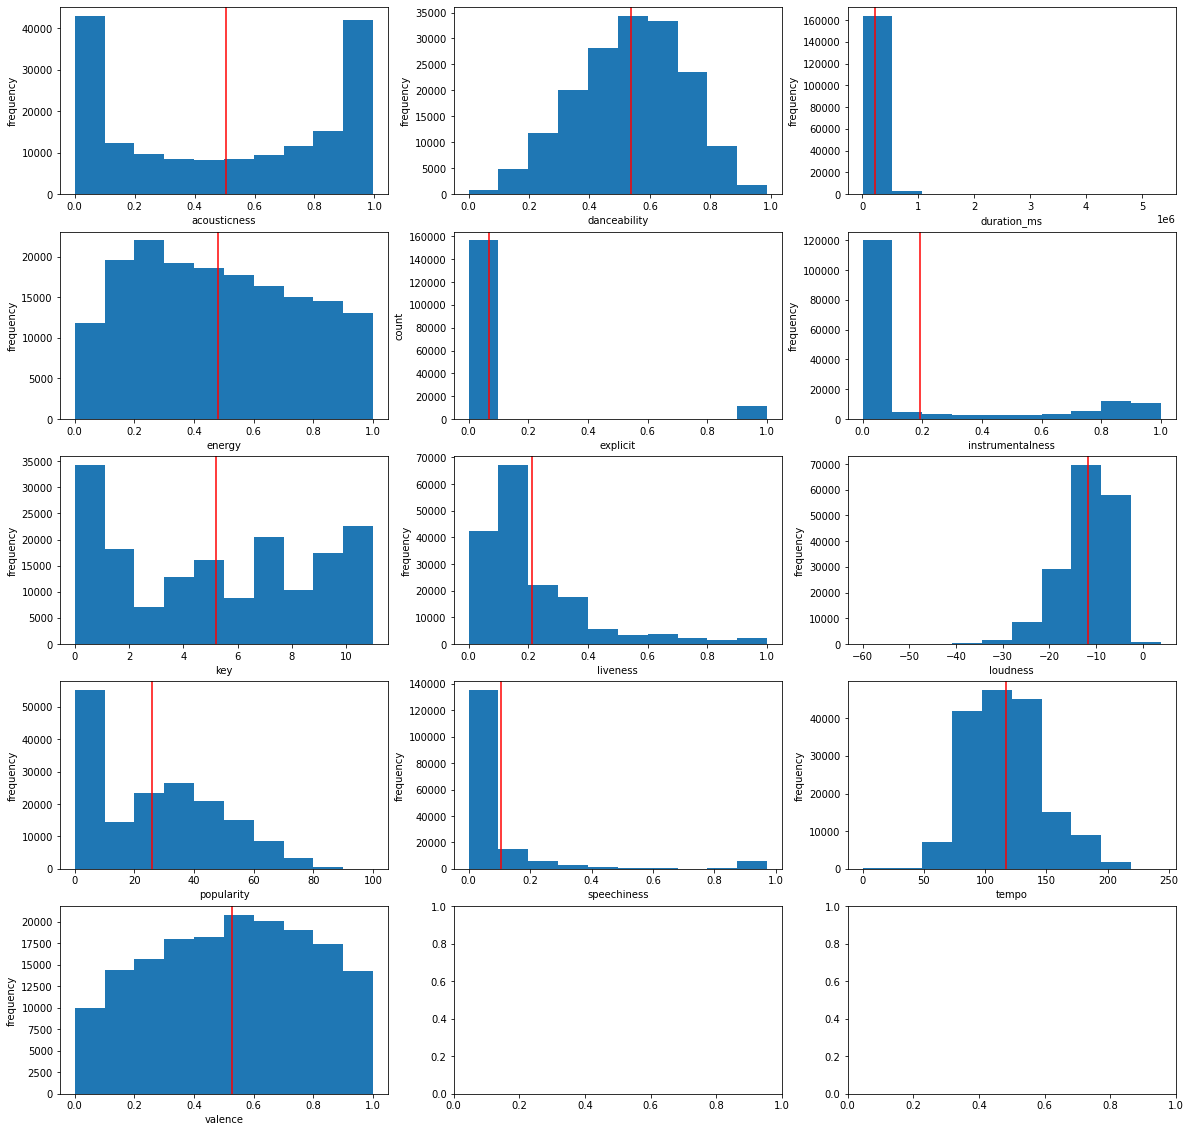

In [ ]:
plotfeatures(df)

Acousticness is fairly evenly distributed with a vast concentration of its values at the edges, i.e, 1 and 0. Danceability, loudness, tempo and valence are also evenly distributed. We found that a lot of the other variables were fairly skewed either positive or negative, but not skewed enough to suggest the possibility of outliers. Instrumentalness, Liveness and Speechiness are the only variables so heavily skewed that it is necessary to make boxplots for them to investigate if outliers exist.

Text(0, 0.5, 'speechiness')

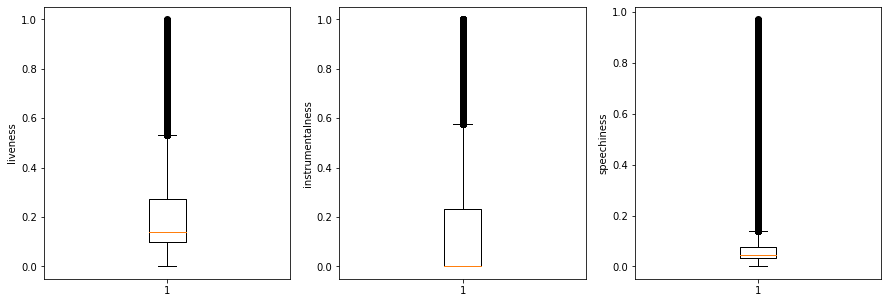

In [ ]:
figure, axes = plt.subplots(1, 3, figsize=(15,5), sharey=False)
axes[0].boxplot(df.liveness)
axes[0].set_ylabel("liveness")
axes[1].boxplot(df.instrumentalness)
axes[1].set_ylabel("instrumentalness")
axes[2].boxplot(df.speechiness)
axes[2].set_ylabel("speechiness")

From the boxplot given the concentration beyond the 25th and 75th percentile, it can be seen that our skews were caused more by high concentrations in certain values and few at extremes. However the concentrations beyond 1.5 IQR are high enough that it eliminates the probability of those entries being outliers.

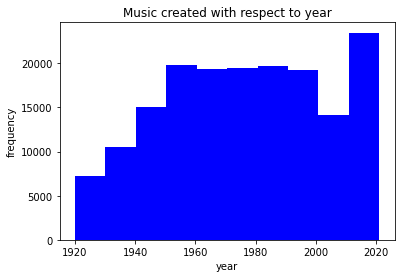

In [ ]:
plt.hist(df.year, color= "blue")
plt.xlabel("year")
plt.ylabel("frequency")
plt.title("Music created with respect to year")
plt.show()

We also plotted a histogram to see how our data is distributed through the years

##### Bivariate Analysis

In this section we mainly looked at the correlation between continuous variables, we began by showing a correlation table and then a correlation heatmap.

In [ ]:
corrs = df[["acousticness", "danceability", "duration_ms", "energy",
       "explicit", "id", "instrumentalness", "key", "liveness", "loudness",
       "mode", "popularity", "speechiness", "tempo",
       "valence", "year"]].corr()
corrs

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.260938,-0.085930,-0.747035,-0.211774,0.227130,-0.027780,-0.031120,-0.539837,0.061692,-0.412306,-0.022914,-0.220491,-0.166237,-0.605087
danceability,-0.260938,1.000000,-0.105061,0.201386,0.202747,-0.220870,0.026420,-0.109760,0.244627,-0.045344,0.131355,0.242864,0.003371,0.542255,0.148234
duration_ms,-0.085930,-0.105061,1.000000,0.057406,-0.035190,0.102332,0.001365,0.031102,0.017666,-0.046010,0.028760,-0.099416,-0.009635,-0.184358,0.106204
energy,-0.747035,0.201386,0.057406,1.000000,0.103148,-0.179233,0.036127,0.137608,0.776887,-0.053156,0.342621,-0.115820,0.263526,0.326747,0.539537
explicit,-0.211774,0.202747,-0.035190,0.103148,1.000000,-0.129527,0.006183,0.037558,0.105973,-0.062464,0.153663,0.355708,0.007421,-0.010779,0.152668
instrumentalness,0.227130,-0.220870,0.102332,-0.179233,-0.129527,1.000000,-0.006075,-0.046017,-0.316015,-0.054788,-0.293961,-0.134689,-0.068589,-0.211745,-0.124422
key,-0.027780,0.026420,0.001365,0.036127,0.006183,-0.006075,1.000000,-0.003251,0.025460,-0.126140,0.002027,0.010020,0.005730,0.026005,0.019987
liveness,-0.031120,-0.109760,0.031102,0.137608,0.037558,-0.046017,-0.003251,1.000000,0.063609,0.001071,-0.084014,0.122776,0.009306,-0.007485,-0.008668
loudness,-0.539837,0.244627,0.017666,0.776887,0.105973,-0.316015,0.025460,0.063609,1.000000,-0.016336,0.347521,-0.219462,0.214961,0.300580,0.462380
mode,0.061692,-0.045344,-0.046010,-0.053156,-0.062464,-0.054788,-0.126140,0.001071,-0.016336,1.000000,0.003465,-0.041115,0.002752,0.020875,-0.044478


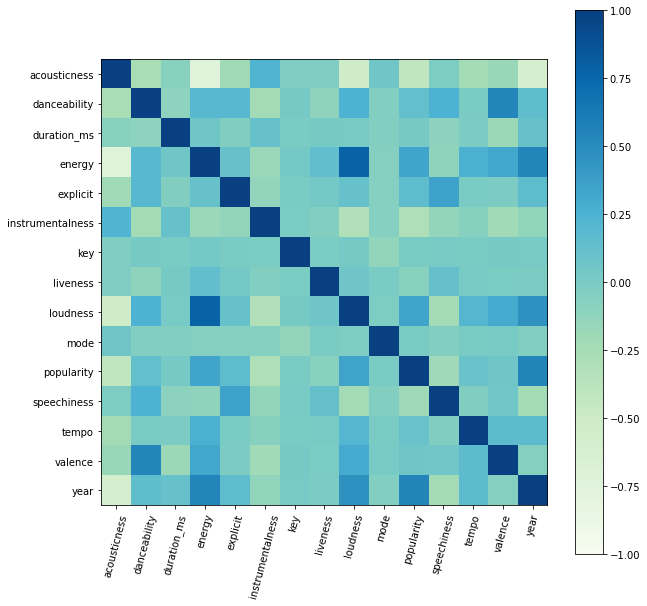

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.imshow(corrs, cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()

#### Example feature distribution of songs in the year 2020

Choosing the year 2020 given its popularity, we looked at the distribution of features in the year.

In [ ]:
Year2020 = df[ df.iloc[:,17]== 2020 ]
Year2020.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
9111,0.881,['Joni Mitchell'],0.644,313093,0.212,0,55qyghODi24yaDgKBI6lx0,0.000022,11,0.7980,-14.118,1,"The Circle Game - Live at The 2nd Fret, Philad...",19,0.0347,117.072,0.441,2020
9117,0.955,['Joni Mitchell'],0.627,295093,0.184,0,00xemFYjQNRpOlPhVaLAHa,0.000162,1,0.0986,-15.533,1,"Urge For Going - Live at The 2nd Fret, Philade...",19,0.0450,115.864,0.299,2020
9119,0.888,['Joni Mitchell'],0.581,183440,0.331,0,2lm5FQJRHvc3rUN5YHpEWj,0.000015,6,0.1470,-14.087,1,What's The Story Mr. Blue - Live at The 2nd Fr...,19,0.2430,88.303,0.642,2020
9121,0.930,['Joni Mitchell'],0.442,147907,0.399,0,26g4FBGTB9YEj7q4HlblFf,0.000499,6,0.9120,-12.661,1,"Brandy Eyes - Live at The 2nd Fret, Philadelph...",19,0.0780,121.662,0.554,2020
9129,0.949,['Joni Mitchell'],0.570,64173,0.176,0,05sxkljafFBW2vEnVczQy1,0.000000,6,0.1470,-22.676,0,Intro To Urge For Going - Live at The 2nd Fret...,19,0.2990,135.687,0.348,2020


In [ ]:
Year2020.shape

(3581, 18)

In [ ]:
Year2020.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,3581.000000,3581.000000,3.581000e+03,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.000000,3581.0
mean,0.203399,0.601189,2.188476e+05,0.674500,0.187099,0.246403,5.348506,0.242367,-8.036740,0.591176,26.752583,0.100216,124.041462,0.453430,2020.0
std,0.285301,0.171117,1.169250e+05,0.228869,0.390045,0.367816,3.583679,0.214393,3.973734,0.491685,31.230038,0.104393,25.860578,0.253368,0.0
min,0.000001,0.000000,8.042000e+03,0.004690,0.000000,0.000000,0.000000,0.011900,-35.708000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.0
25%,0.003460,0.482000,1.623990e+05,0.530000,0.000000,0.000000,2.000000,0.099800,-9.257000,0.000000,0.000000,0.039200,105.003000,0.241000,2020.0
50%,0.054200,0.614000,2.057980e+05,0.702000,0.000000,0.000455,6.000000,0.145000,-7.129000,1.000000,13.000000,0.056500,127.036000,0.442000,2020.0
75%,0.290000,0.728000,2.510000e+05,0.867000,0.000000,0.605000,8.000000,0.325000,-5.615000,1.000000,68.000000,0.111000,139.605000,0.653000,2020.0
max,0.996000,0.980000,2.059336e+06,1.000000,1.000000,0.995000,11.000000,0.993000,0.977000,1.000000,96.000000,0.954000,221.954000,0.997000,2020.0


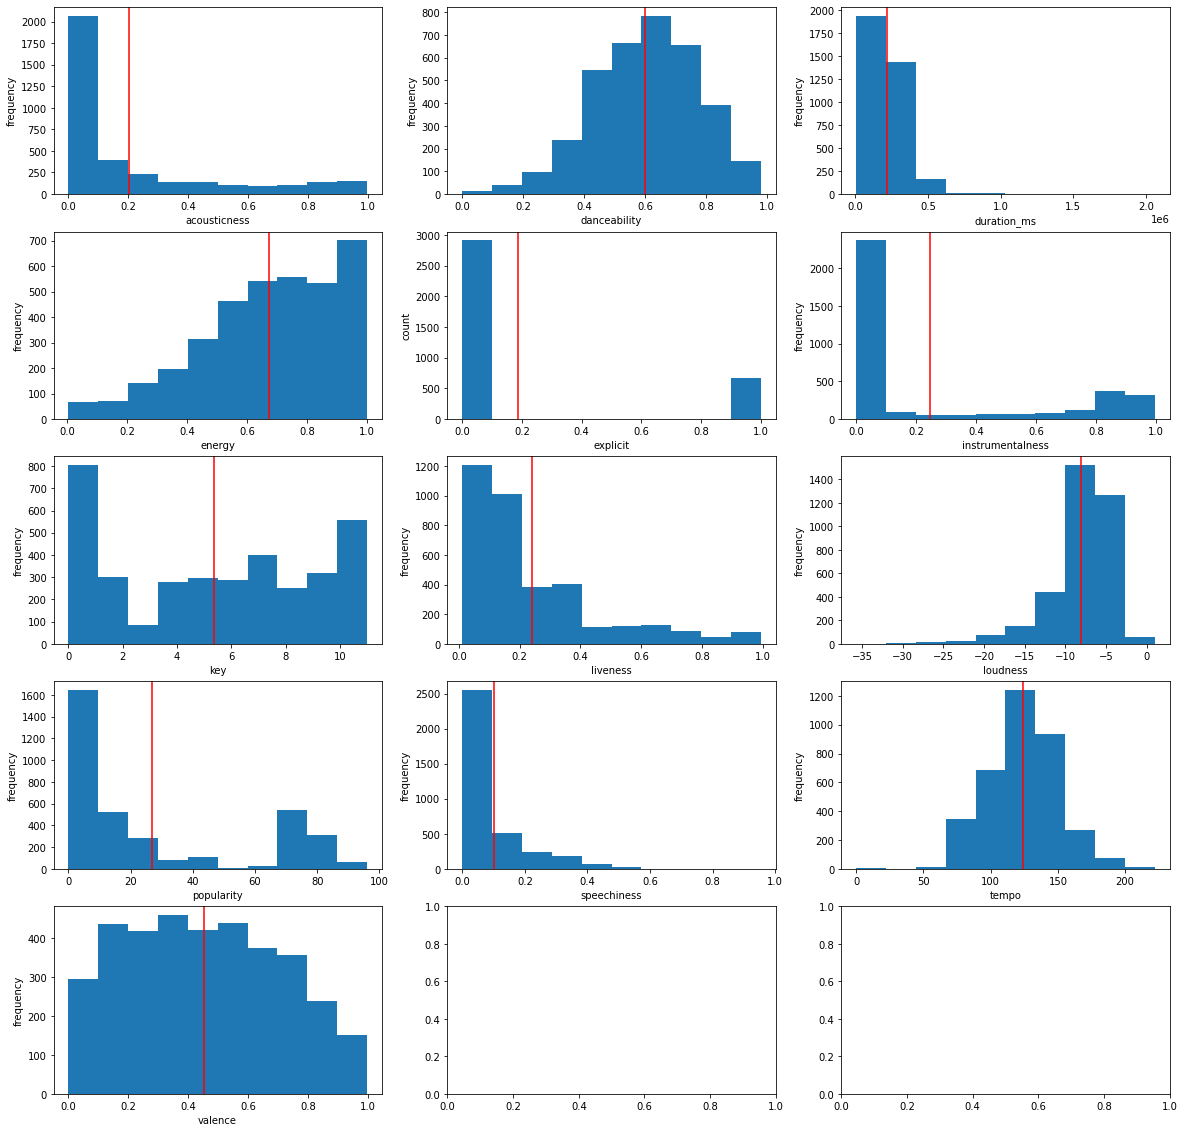

In [ ]:
plotfeatures(Year2020)

#### Analysis of the most popular artists and songs

##### Analysis of the Most Popular Songs

In this section we create a new dataframe from our original by introducing a popularity benchmark, thereby leaving us with only the most popular songs

In [ ]:
#Introduced a popularity benchmark which is the mean plus 1 and a half the standard deviation of popularity values in the dataframe
benchmark = df.popularity.mean() + (1.5 * df.popularity.std()) 
Popular = df[ df.iloc[:,13]>= benchmark ]
Popular.shape


(13885, 18)

In [ ]:
Popular.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,13885.000000,13885.000000,1.388500e+04,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000
mean,0.267304,0.610832,2.256356e+05,0.623043,0.247893,0.048070,5.211019,0.181416,-7.701071,0.660137,66.607778,0.091229,121.149403,0.515306,2005.566655
std,0.285535,0.165543,7.082555e+04,0.213589,0.431805,0.175795,3.566685,0.145275,4.128767,0.473680,6.249448,0.097837,30.086314,0.247522,14.950291
min,0.000000,0.000000,3.701300e+04,0.000020,0.000000,0.000000,0.000000,0.000000,-54.376000,0.000000,59.000000,0.000000,0.000000,0.000000,1939.000000
25%,0.030700,0.506000,1.885600e+05,0.483000,0.000000,0.000000,2.000000,0.094000,-9.258000,0.000000,62.000000,0.034800,97.017000,0.322000,1999.000000
50%,0.154000,0.623000,2.188930e+05,0.647000,0.000000,0.000003,5.000000,0.123000,-6.755000,1.000000,65.000000,0.048800,120.016000,0.512000,2011.000000
75%,0.437000,0.731000,2.542000e+05,0.789000,0.000000,0.000530,8.000000,0.225000,-5.071000,1.000000,70.000000,0.097500,140.081000,0.716000,2017.000000
max,0.996000,0.980000,4.120258e+06,1.000000,1.000000,1.000000,11.000000,0.986000,1.342000,1.000000,100.000000,0.868000,220.099000,0.991000,2021.000000


While most variables remain pretty similar, acousticness and instrumentalness are noticeably lower in mean and percentiles, while loudness and energy show significant increase.

In [ ]:
TopSongs = Popular
TopSongs.sort_values(by='popularity', ascending=True)
TopSongs.head(10)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
3662,0.938,['Harry James'],0.271,203773,0.2190,0,52XDumqYDUXX16R7FM5fpV,0.000860,0,0.2630,-9.767,1,"It's Been a Long, Long Time",59,0.0310,74.680,0.375,1939
4262,0.673,"['Bing Crosby', 'Ken Darby Singers', 'John Sco...",0.317,177480,0.1580,0,4so0Wek9Ig1p6CRCHuINwW,0.353000,9,0.3380,-16.485,1,White Christmas,80,0.0381,130.503,0.247,1942
4662,0.970,['Judy Garland'],0.156,162333,0.1840,0,030mot3ZKR3oskfMsqDB2R,0.004580,6,0.2600,-14.820,1,Have Yourself A Merry Little Christmas,74,0.0393,180.887,0.107,1944
4862,0.646,"['Bing Crosby', 'The Andrews Sisters']",0.500,175333,0.2240,0,04vLj9QUXoKdRlsp3gkURo,0.000000,3,0.2840,-12.431,1,Mele Kalikimaka (Merry Christmas),64,0.0935,202.481,0.620,1945
4863,0.770,['Bing Crosby'],0.473,166000,0.2120,0,44mYhOVgerj2qPjkGDVA6n,0.000000,0,0.1360,-15.018,0,It's Beginning To Look Like Christmas,61,0.0496,96.940,0.576,1945
4864,0.981,"['Doris Day', 'The Mellomen']",0.495,167907,0.0209,0,0qB213IfGN0JXXm9aRjldF,0.000001,3,0.0753,-21.329,1,Again (with The Mellomen),59,0.0348,62.588,0.145,1945
5262,0.799,['Gene Autry'],0.834,150267,0.3710,0,25leEEaz1gIpp7o21Fqyjo,0.000000,1,0.2750,-11.990,1,Here Comes Santa Claus (Right Down Santa Claus...,73,0.0358,96.628,0.976,1947
5263,0.883,['Gene Autry'],0.629,186733,0.1590,0,1dtIaSlyrLI04sqYa8nLyN,0.000000,8,0.2220,-14.056,1,Rudolph the Red-Nosed Reindeer,65,0.0495,142.157,0.642,1947
5264,0.847,"['Gene Autry', 'Cass County Boys']",0.677,173493,0.2410,0,3i8j2dKXChkErfi8jsDDuH,0.000000,8,0.0523,-11.133,1,Frosty the Snowman (with The Cass County Boys)...,61,0.0407,172.315,0.963,1947
5662,0.926,"['Bing Crosby', 'The Andrews Sisters']",0.641,203746,0.4130,0,0cAhE2iDJApegDnVRx6fCK,0.000000,3,0.1910,-5.624,1,Twelve Days Of Christmas,68,0.0435,143.522,0.834,1949


We sorted the entries in our dataframe of popular songs and sorted it so as to see the top 10 most popular songs in the dataframe.

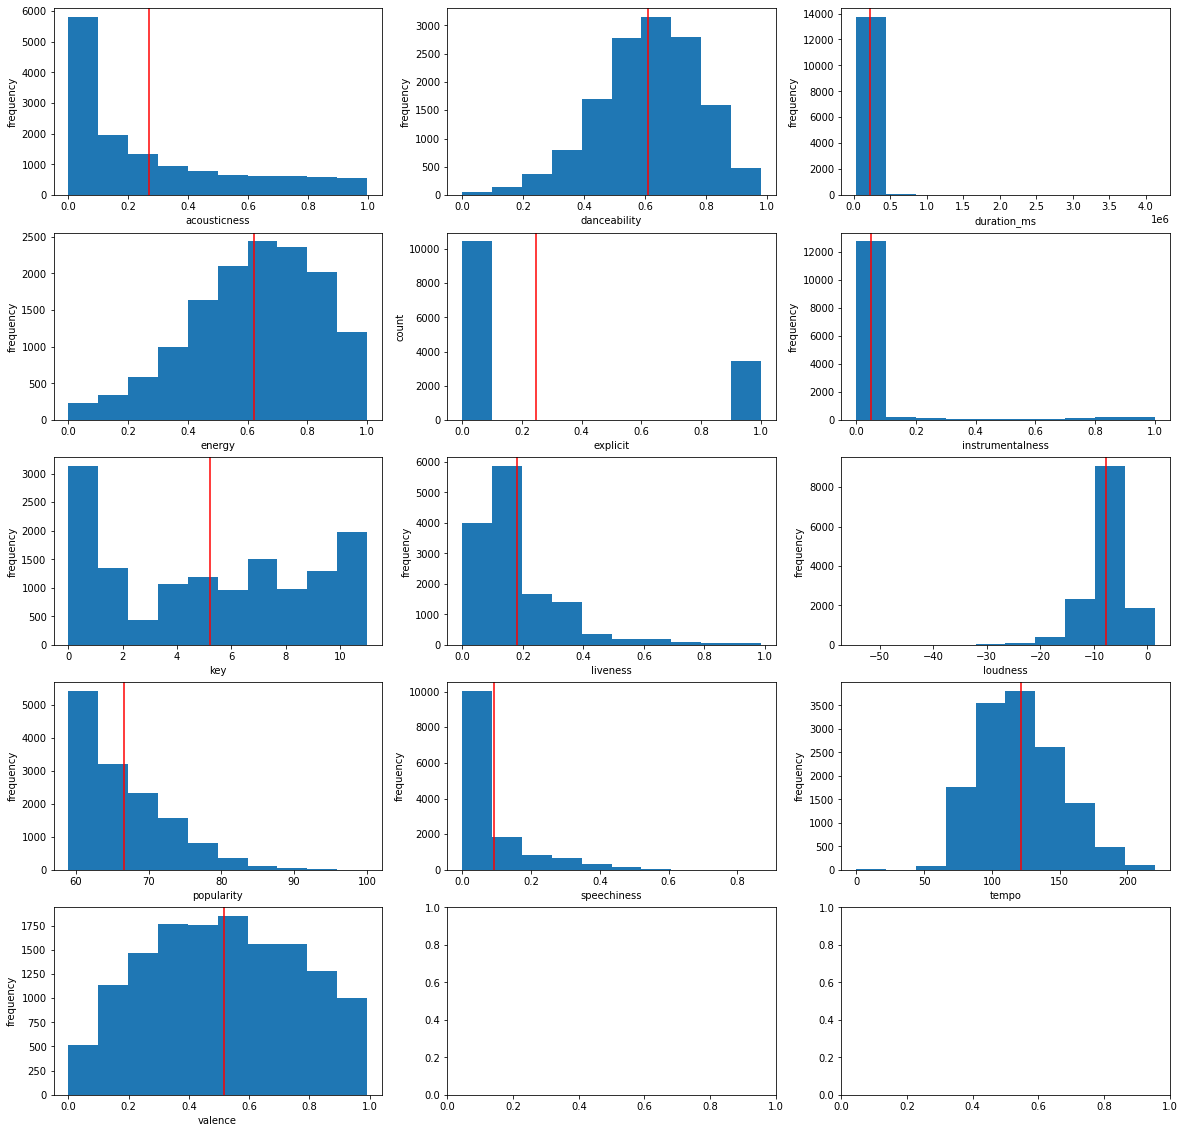

In [ ]:
plotfeatures(Popular)


We notice the most disparity in the skewness of the graphs of acousticness (positive skew), energy (negative skew), loudness (increasingly negatively skewed), for instrumentalness we can also notice an increased concentration of values towards 0.

###### Brief Temporal Analysis of the Most Popular songs

In this section we grouped our data by year and then looked at how the most popular songs had changed over time

In [ ]:
data = Popular.groupby(['year']).mean()
data.sort_values(by='year', ascending=True)
data.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
year,,,,,,,,,,,,,,
1939,0.938,0.271000,203773.000000,0.2190,0.0,8.600000e-04,0.000000,0.2630,-9.767000,1.000000,59.000000,0.0310,74.680000,0.375000
1942,0.673,0.317000,177480.000000,0.1580,0.0,3.530000e-01,9.000000,0.3380,-16.485000,1.000000,80.000000,0.0381,130.503000,0.247000
1944,0.970,0.156000,162333.000000,0.1840,0.0,4.580000e-03,6.000000,0.2600,-14.820000,1.000000,74.000000,0.0393,180.887000,0.107000
1945,0.799,0.489333,169746.666667,0.1523,0.0,3.766667e-07,2.000000,0.1651,-16.259333,0.666667,61.333333,0.0593,120.669667,0.447000
1947,0.843,0.713333,170164.333333,0.2570,0.0,0.000000e+00,5.666667,0.1831,-12.393000,1.000000,66.333333,0.0420,137.033333,0.860333


We created a function that makes plot of continuous variables against time given a dataframe parameter.

In [ ]:
def PlotTemporal(data):
    fig, axe = plt.subplots(5, 3, figsize=(20,20), sharey=False)
    axe[0,0].plot(data.acousticness)
    axe[0,0].set_xlabel('time')
    axe[0,0].set_ylabel('acousticness')
    axe[0,1].plot(data.danceability)
    axe[0,1].set_xlabel('time')
    axe[0,1].set_ylabel('danceability')
    axe[0,2].plot(data.duration_ms)
    axe[0,2].set_xlabel('time')
    axe[0,2].set_ylabel('duration_ms')
    axe[1,0].plot(data.energy)
    axe[1,0].set_xlabel('time')
    axe[1,0].set_ylabel('energy')
    axe[1,1].plot(data.explicit)
    axe[1,1].set_xlabel('time')
    axe[1,1].set_ylabel('explicit')
    axe[1,2].plot(data.instrumentalness)
    axe[1,2].set_xlabel('time')
    axe[1,2].set_ylabel('instrumentalness')
    axe[2,0].plot(data.key)
    axe[2,0].set_xlabel('time')
    axe[2,0].set_ylabel('key')
    axe[2,1].plot(data.liveness)
    axe[2,1].set_xlabel('time')
    axe[2,1].set_ylabel('liveness')
    axe[2,2].plot(data.loudness)
    axe[2,2].set_xlabel('time')
    axe[2,2].set_ylabel('loudness')
    axe[3,0].plot(data.popularity)
    axe[3,0].set_xlabel('time')
    axe[3,0].set_ylabel('popularity')
    axe[3,1].plot(data.speechiness)
    axe[3,1].set_xlabel('time')
    axe[3,1].set_ylabel('speechiness')  
    axe[3,2].plot(data.tempo)
    axe[3,2].set_xlabel('time')
    axe[3,2].set_ylabel('tempo')
    axe[4,0].plot(data.valence) 
    axe[4,0].set_xlabel('time')
    axe[4,0].set_ylabel('valence')

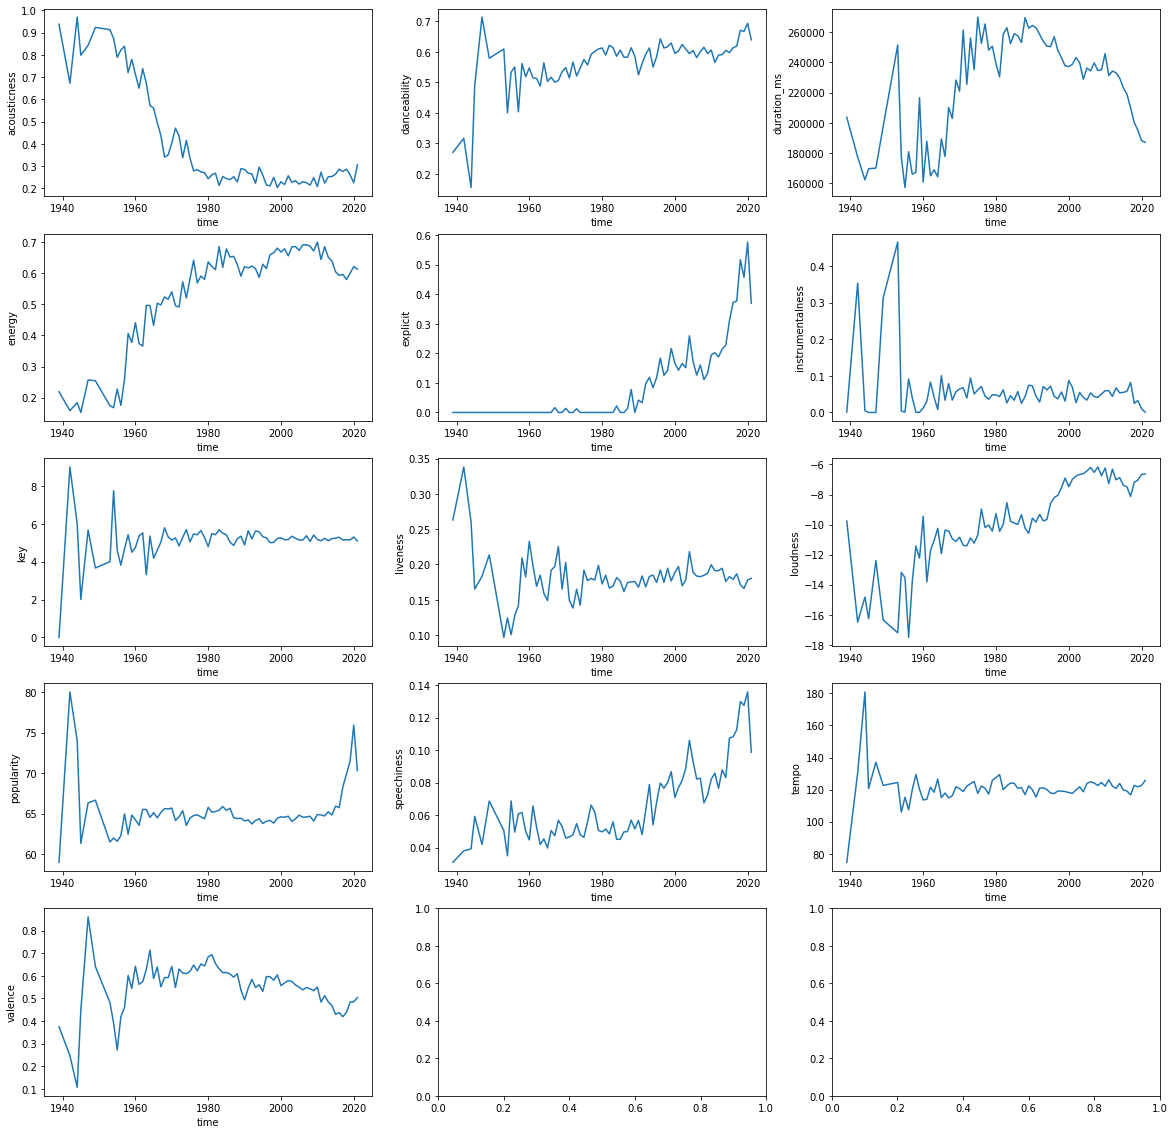

In [ ]:
PlotTemporal(data)

We observed a noticeable reduction in acousticness, instrumentalness, liveness, and tempo. There was also noticeable increase in speechiness, loudness, energy, duration and explicitness. Danceability and Valence remained mostly constant with peaks and dips.

##### Analysis of the Most Popular Artists

In this section we grouped our data by artists and then once again introduced a benchmark to create a separate dataframe of the most popular artists.

In [ ]:
df['artists'] = df['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', str(x)))
df = df.explode('artists')
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
174384,0.00917,Tony T,0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,0.0356,125.972,0.186,2020
174385,0.79500,Alessia Cara,0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,0.0360,94.710,0.228,2021
174386,0.80600,Roger Fly,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,0.0282,108.058,0.714,2020
174387,0.92000,Taylor Swift,0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,0.0377,171.319,0.320,2021
174388,0.23900,Roger Fly,0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,0.0258,112.208,0.747,2020


In [ ]:
df_a = df
df_a['freq'] = df.groupby('artists')['artists'].transform('count')
df_a.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,freq
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920,9.0
1,0.643000,NaN,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,0.0534,86.889,0.9500,1920,NaN
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,0.1740,97.600,0.6890,1920,9.0
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920,3.0
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,0.0768,122.076,0.2990,1920,1.0


In [ ]:
Artist = df_a.groupby(['artists']).mean()
Artist.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,freq
artists,,,,,,,,,,,,,,,,
Mo,0.461200,0.728714,181083.857143,0.385543,0.0,5.026714e-04,3.00,0.071500,-11.557571,1.00,35.428571,0.047671,114.317143,0.717571,1984.142857,7.0
-Sd-,0.010600,0.880000,451765.000000,0.494000,0.0,4.720000e-01,9.00,0.115000,-7.633000,0.00,0.000000,0.183000,136.031000,0.261000,2018.000000,1.0
015B,0.489500,0.614950,235824.950000,0.556950,0.0,4.612855e-04,4.85,0.191885,-6.011100,0.75,16.200000,0.064300,113.490500,0.446250,2019.400000,20.0
03 Greedo,0.139933,0.660000,240673.333333,0.518667,1.0,6.666667e-07,2.00,0.101767,-8.709333,0.00,66.666667,0.061467,86.159667,0.340667,2017.666667,3.0
070 Shake,0.011400,0.696000,398106.000000,0.667000,1.0,0.000000e+00,0.00,0.181000,-7.665000,0.00,62.000000,0.040700,121.932000,0.287000,2016.000000,1.0


In [ ]:
Artist.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,freq
count,29804.000000,29804.000000,2.980400e+04,29804.000000,29804.000000,29804.000000,29804.000000,29804.000000,29804.000000,29804.000000,29804.000000,29804.000000,29804.000000,29804.000000,29804.000000,29804.000000
mean,0.450458,0.551512,2.495836e+05,0.527790,0.075479,0.234607,5.254478,0.208532,-10.996184,0.667810,24.819738,0.091375,117.507676,0.494777,1988.077281,7.057408
std,0.382979,0.176509,1.565417e+05,0.268088,0.251070,0.334650,2.865414,0.151110,5.610666,0.393496,23.176256,0.109448,24.310417,0.246728,27.527362,31.145878
min,0.000000,0.000000,1.200000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000,1.000000
25%,0.052834,0.435000,1.816482e+05,0.300975,0.000000,0.000012,3.375000,0.109000,-13.791375,0.426230,0.000000,0.039725,101.207659,0.301000,1965.000000,1.000000
50%,0.380034,0.562000,2.227512e+05,0.541472,0.000000,0.009995,5.129535,0.161683,-9.842500,0.857143,23.333333,0.052800,118.865482,0.501000,1995.500000,1.000000
75%,0.870000,0.683811,2.832108e+05,0.750000,0.000000,0.454673,7.000000,0.258568,-6.894992,1.000000,44.000000,0.090439,130.550000,0.686000,2013.000000,4.000000
max,0.996000,0.987000,4.696690e+06,1.000000,1.000000,1.000000,11.000000,0.986000,3.367000,1.000000,94.000000,0.971000,219.833000,0.997000,2021.000000,2228.000000


In [ ]:
benchmark = Artist.popularity.mean() + (2 * Artist.popularity.std())
PopArtist = Artist[ Artist.iloc[:,10]>= benchmark ]
PopArtist.shape

(488, 16)

Sorting again by popularity we look at the 10 most popular artists in our dataset.

In [ ]:
PopArtist = PopArtist.sort_values(by='popularity', ascending=False)
PopArtist.head(10)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,freq
artists,,,,,,,,,,,,,,,,
CJ,0.1900,0.711,123429.0,0.598,1.0,0.000000,3.0,0.1500,-7.621,0.0,94.0,0.1820,140.175,0.737,2020.0,1.0
Boza,0.3620,0.725,186133.0,0.756,0.0,0.000685,4.0,0.1030,-5.013,1.0,92.0,0.0572,100.070,0.828,2020.0,1.0
Juhn,0.1220,0.713,232853.0,0.617,0.0,0.000000,8.0,0.0962,-4.637,1.0,91.0,0.0887,168.021,0.682,2020.0,1.0
Joel Corry,0.1680,0.734,166028.0,0.874,0.0,0.000011,8.0,0.0489,-3.158,1.0,91.0,0.0662,122.953,0.905,2020.0,1.0
Los Legendarios,0.3100,0.823,213314.0,0.821,0.0,0.000004,8.0,0.1430,-3.402,0.0,89.0,0.1660,99.999,0.791,2020.0,1.0
Lele Pons,0.0907,0.905,155825.0,0.686,0.0,0.000000,0.0,0.2660,-3.152,1.0,89.0,0.0664,103.013,0.963,2020.0,1.0
Ritt Momney,0.0563,0.399,210463.0,0.491,0.0,0.000890,6.0,0.1100,-10.778,0.0,89.0,0.0538,91.066,0.151,2020.0,1.0
KIDDO,0.2860,0.504,190218.0,0.760,1.0,0.000000,4.0,0.1510,-4.246,1.0,87.0,0.0426,183.933,0.640,2020.0,1.0
Surf Mesa,0.0686,0.674,176547.0,0.774,0.0,0.001880,11.0,0.3930,-7.567,0.0,86.0,0.0892,112.050,0.330,2019.0,1.0


In [ ]:
PopArtist.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,freq
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,0.263743,0.667747,200685.303857,0.628571,0.352377,0.035200,5.429668,0.165635,-6.890832,0.573111,75.403222,0.112904,121.240856,0.489413,2017.710713,3.471311
std,0.246107,0.153203,45058.715626,0.179593,0.443135,0.156519,3.042410,0.100944,3.804505,0.429891,3.755550,0.100930,26.962908,0.218377,3.856691,7.562145
min,0.000038,0.000000,79936.000000,0.002697,0.000000,0.000000,0.000000,0.028200,-34.256000,0.000000,71.200000,0.000000,0.000000,0.000000,1983.000000,1.000000
25%,0.071900,0.589917,173406.217949,0.525750,0.000000,0.000000,3.250000,0.103000,-7.689167,0.000000,72.713077,0.045700,103.516150,0.327633,2017.000000,1.000000
50%,0.185542,0.676500,196340.500000,0.640000,0.000000,0.000003,5.716117,0.136125,-6.012000,0.666667,74.333333,0.075625,121.955625,0.471625,2018.983146,1.000000
75%,0.390750,0.777083,222419.000000,0.752542,1.000000,0.000435,8.000000,0.196217,-4.809375,1.000000,77.000000,0.141294,135.090500,0.655125,2020.000000,2.250000
max,0.982000,0.958000,358366.666667,0.981000,1.000000,1.000000,11.000000,0.704000,-1.746000,1.000000,94.000000,0.777000,210.164000,0.963000,2021.000000,89.000000


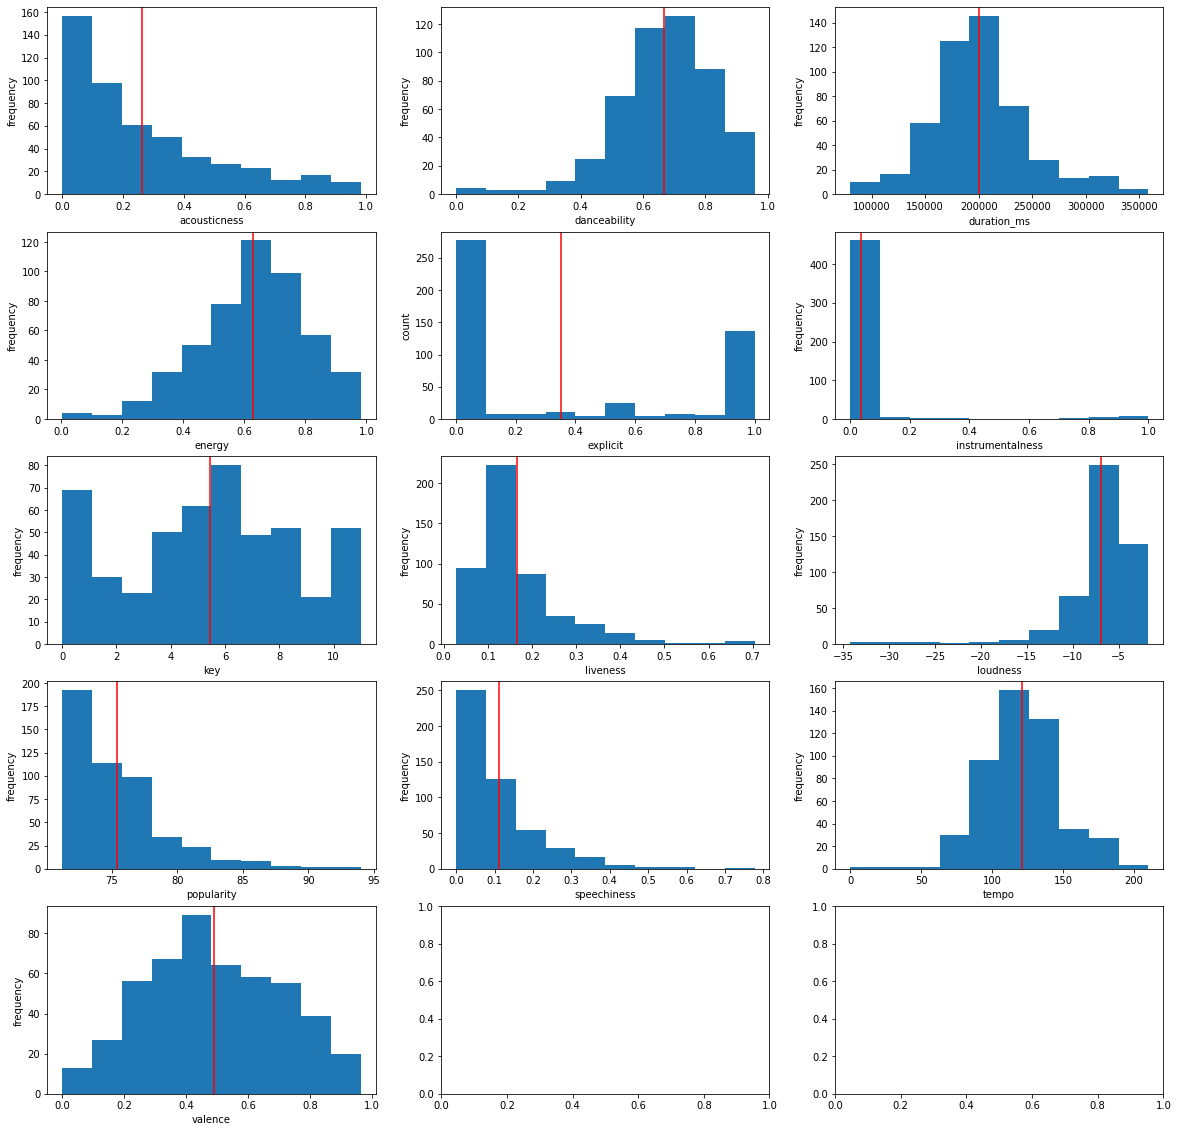

In [ ]:
plotfeatures(PopArtist)

####Analyzing how songs of different genres change with time


In this section we merge our dataframe with another containing genre information, and then selecting the top four most occuring genres in our dataset we looked at how the songs in this genre had changed with time.

In [ ]:
genre = pd.read_csv("/content/drive/My Drive/Data/data_w_genres.csv")
merged = pd.merge(df, genre, on="artists")
merged.tail()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,speechiness_x,tempo_x,valence_x,year,freq,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
210216,0.96600,Johannes Bornlöf,0.269,424200,0.0926,0,4yBReaKJW78ZYCHpc1cfaK,0.89000,9,0.0992,-24.280,0,Divenire,0,0.0609,120.323,0.1020,2021,5.0,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,"['background music', 'calming instrumental', '..."
210217,0.98800,Johannes Bornlöf,0.316,303333,0.0573,0,6QGVWUbmlePAiY5zJjfCmT,0.87900,3,0.1200,-24.121,1,Night,0,0.0515,81.070,0.0373,2021,5.0,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,"['background music', 'calming instrumental', '..."
210218,0.00516,Febration,0.665,183307,0.9260,0,4QRXELBqRwQQjd366OG1Do,0.00428,1,0.1240,-4.571,1,Forever In Paradise,0,0.0651,126.914,0.1280,2020,1.0,0.005160,0.665,183307.000000,0.926000,0.004280,0.124000,-4.571000,0.065100,126.914000,0.128000,0.0,1,1,4,[]
210219,0.01560,Elyamont,0.708,191341,0.8490,0,54NeJ65oDIydq9jr0b8qjg,0.00000,0,0.1460,-2.579,1,Signals - Radio Edit,0,0.0457,123.052,0.4520,2020,1.0,0.015600,0.708,191341.000000,0.849000,0.000000,0.146000,-2.579000,0.045700,123.052000,0.452000,0.0,0,1,2,[]
210220,0.14100,Keyvo400,0.544,215014,0.4070,1,3ASGdyWXeXsXtOIWtm0tv4,0.00000,4,0.2530,-12.745,0,LayUp,0,0.2330,129.750,0.4900,2020,1.0,0.141000,0.544,215014.000000,0.407000,0.000000,0.253000,-12.745000,0.233000,129.750000,0.490000,0.0,4,0,4,[]


In [ ]:
merged['genres'] = merged['genres'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', str(x)))
merged = merged.explode('genres')
merged.tail()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,speechiness_x,tempo_x,valence_x,year,freq,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
210217,0.98800,Johannes Bornlöf,0.316,303333,0.0573,0,6QGVWUbmlePAiY5zJjfCmT,0.87900,3,0.120,-24.121,1,Night,0,0.0515,81.070,0.0373,2021,5.0,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,focus
210217,0.98800,Johannes Bornlöf,0.316,303333,0.0573,0,6QGVWUbmlePAiY5zJjfCmT,0.87900,3,0.120,-24.121,1,Night,0,0.0515,81.070,0.0373,2021,5.0,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,neo-classical
210218,0.00516,Febration,0.665,183307,0.9260,0,4QRXELBqRwQQjd366OG1Do,0.00428,1,0.124,-4.571,1,Forever In Paradise,0,0.0651,126.914,0.1280,2020,1.0,0.005160,0.665,183307.000000,0.926000,0.004280,0.124000,-4.571000,0.065100,126.914000,0.128000,0.0,1,1,4,NaN
210219,0.01560,Elyamont,0.708,191341,0.8490,0,54NeJ65oDIydq9jr0b8qjg,0.00000,0,0.146,-2.579,1,Signals - Radio Edit,0,0.0457,123.052,0.4520,2020,1.0,0.015600,0.708,191341.000000,0.849000,0.000000,0.146000,-2.579000,0.045700,123.052000,0.452000,0.0,0,1,2,NaN
210220,0.14100,Keyvo400,0.544,215014,0.4070,1,3ASGdyWXeXsXtOIWtm0tv4,0.00000,4,0.253,-12.745,0,LayUp,0,0.2330,129.750,0.4900,2020,1.0,0.141000,0.544,215014.000000,0.407000,0.000000,0.253000,-12.745000,0.233000,129.750000,0.490000,0.0,4,0,4,NaN


In [ ]:
merged = merged.drop(["acousticness_y",	"danceability_y",	"duration_ms_y",	"energy_y",	"instrumentalness_y",	"liveness_y",	"loudness_y",	"speechiness_y",	"tempo_y",	"valence_y",	"popularity_y",	"key_y",	"mode_y",	"count"], axis=1)
#We dropped the duplicate columns emerging from the merge

In [ ]:
merged['freq'] = merged.groupby('genres')['genres'].transform('count')
merged.head()
#Adding a frequency column to  show how much a genre appeared in the dataframe

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,speechiness_x,tempo_x,valence_x,year,freq,genres
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.634,1920,1536.0,harlem renaissance
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.634,1920,1648.0,traditional blues
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,0.1740,97.600,0.689,1920,1536.0,harlem renaissance
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,0.1740,97.600,0.689,1920,1648.0,traditional blues
2,0.992,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,-12.453,1,Don't You Advertise Your Man,5,0.0592,85.652,0.487,1920,1536.0,harlem renaissance


In [ ]:
merged_a = merged.groupby(['genres']).mean()
merged_a = merged_a.sort_values(by='freq', ascending=False)
merged_a.head(5)
#Displaying the top 5 most appearing genres

,acousticness_x,danceability_x,duration_ms_x,energy_x,explicit,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,popularity_x,speechiness_x,tempo_x,valence_x,year,freq
genres,,,,,,,,,,,,,,,,
rock,0.231953,0.494802,253438.180940,0.653810,0.029860,0.106244,5.163918,0.238245,-9.550501,0.746358,37.139251,0.058035,123.700867,0.538279,1982.873203,20797.0
adult standards,0.726489,0.478749,196557.523539,0.329153,0.000802,0.130667,5.082557,0.205155,-13.348066,0.755538,25.889677,0.054731,112.331976,0.478174,1965.267786,16207.0
classic rock,0.295756,0.505268,251863.989966,0.599936,0.002971,0.089722,5.099551,0.241308,-10.445987,0.771983,34.104964,0.053336,122.984473,0.568604,1977.745973,15148.0
classical,0.943588,0.326889,303392.826673,0.171253,0.000000,0.594579,5.024230,0.214074,-20.180013,0.728558,9.221522,0.059671,102.502838,0.265345,1955.799456,15064.0
mellow gold,0.371882,0.523555,243431.940952,0.537643,0.002340,0.050881,5.076989,0.222942,-11.025278,0.793370,34.444774,0.046411,120.279846,0.559154,1979.280577,12820.0


In [ ]:
#A function for displaying the time chart for dataframes
def PlotTemporal_x(data, title):
    fig, axe = plt.subplots(5, 3, figsize=(20,20), sharey=False)
    text = "Time chart of " + title + " features"
    fig.suptitle(text, fontsize=16)
    axe[0,0].plot(data.acousticness_x)
    axe[0,0].set_xlabel('time')
    axe[0,0].set_ylabel('acousticness')
    axe[0,1].plot(data.danceability_x)
    axe[0,1].set_xlabel('time')
    axe[0,1].set_ylabel('danceability')
    axe[0,2].plot(data.duration_ms_x)
    axe[0,2].set_xlabel('time')
    axe[0,2].set_ylabel('duration_ms')
    axe[1,0].plot(data.energy_x)
    axe[1,0].set_xlabel('time')
    axe[1,0].set_ylabel('energy')
    axe[1,1].plot(data.explicit)
    axe[1,1].set_xlabel('time')
    axe[1,1].set_ylabel('explicit')
    axe[1,2].plot(data.instrumentalness_x)
    axe[1,2].set_xlabel('time')
    axe[1,2].set_ylabel('instrumentalness')
    axe[2,0].plot(data.key_x)
    axe[2,0].set_xlabel('time')
    axe[2,0].set_ylabel('key')
    axe[2,1].plot(data.liveness_x)
    axe[2,1].set_xlabel('time')
    axe[2,1].set_ylabel('liveness')
    axe[2,2].plot(data.loudness_x)
    axe[2,2].set_xlabel('time')
    axe[2,2].set_ylabel('loudness')
    axe[3,0].plot(data.popularity_x)
    axe[3,0].set_xlabel('time')
    axe[3,0].set_ylabel('popularity')
    axe[3,1].plot(data.speechiness_x)
    axe[3,1].set_xlabel('time')
    axe[3,1].set_ylabel('speechiness')  
    axe[3,2].plot(data.tempo_x)
    axe[3,2].set_xlabel('time')
    axe[3,2].set_ylabel('tempo')
    axe[4,0].plot(data.valence_x) 
    axe[4,0].set_xlabel('time')
    axe[4,0].set_ylabel('valence')

Now, after getting the most appearing genres we then plot time graphs for them to see how they changed over time.

In [ ]:
rock = merged[ merged.iloc[:,19] == "rock" ]
rock.shape

(20797, 20)

In [ ]:
data_r = rock.groupby(['year']).mean()
data_r.sort_values(by='year', ascending=True)
data_r.head()

,acousticness_x,danceability_x,duration_ms_x,energy_x,explicit,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,popularity_x,speechiness_x,tempo_x,valence_x,freq
year,,,,,,,,,,,,,,,
1940,0.97400,0.66900,188160.00,0.1920,0.0,0.938000,10.0,0.2050,-16.07900,1.00,0.0,0.0384,112.63500,0.484,20797.0
1941,0.99500,0.39600,194061.00,0.1960,0.0,0.846000,6.0,0.0882,-13.21400,1.00,0.0,0.2080,174.77500,0.392,20797.0
1942,0.90400,0.42300,217693.00,0.3170,0.0,0.000955,0.0,0.6840,-17.19600,1.00,1.0,0.0342,106.67600,0.195,20797.0
1945,0.98700,0.44000,127933.00,0.4430,0.0,0.844000,0.0,0.8390,-20.14500,1.00,0.0,0.0469,99.84400,0.522,20797.0
1946,0.99525,0.59275,196879.25,0.2045,0.0,0.244377,6.5,0.2920,-8.44125,0.75,0.0,0.2670,74.89725,0.641,20797.0


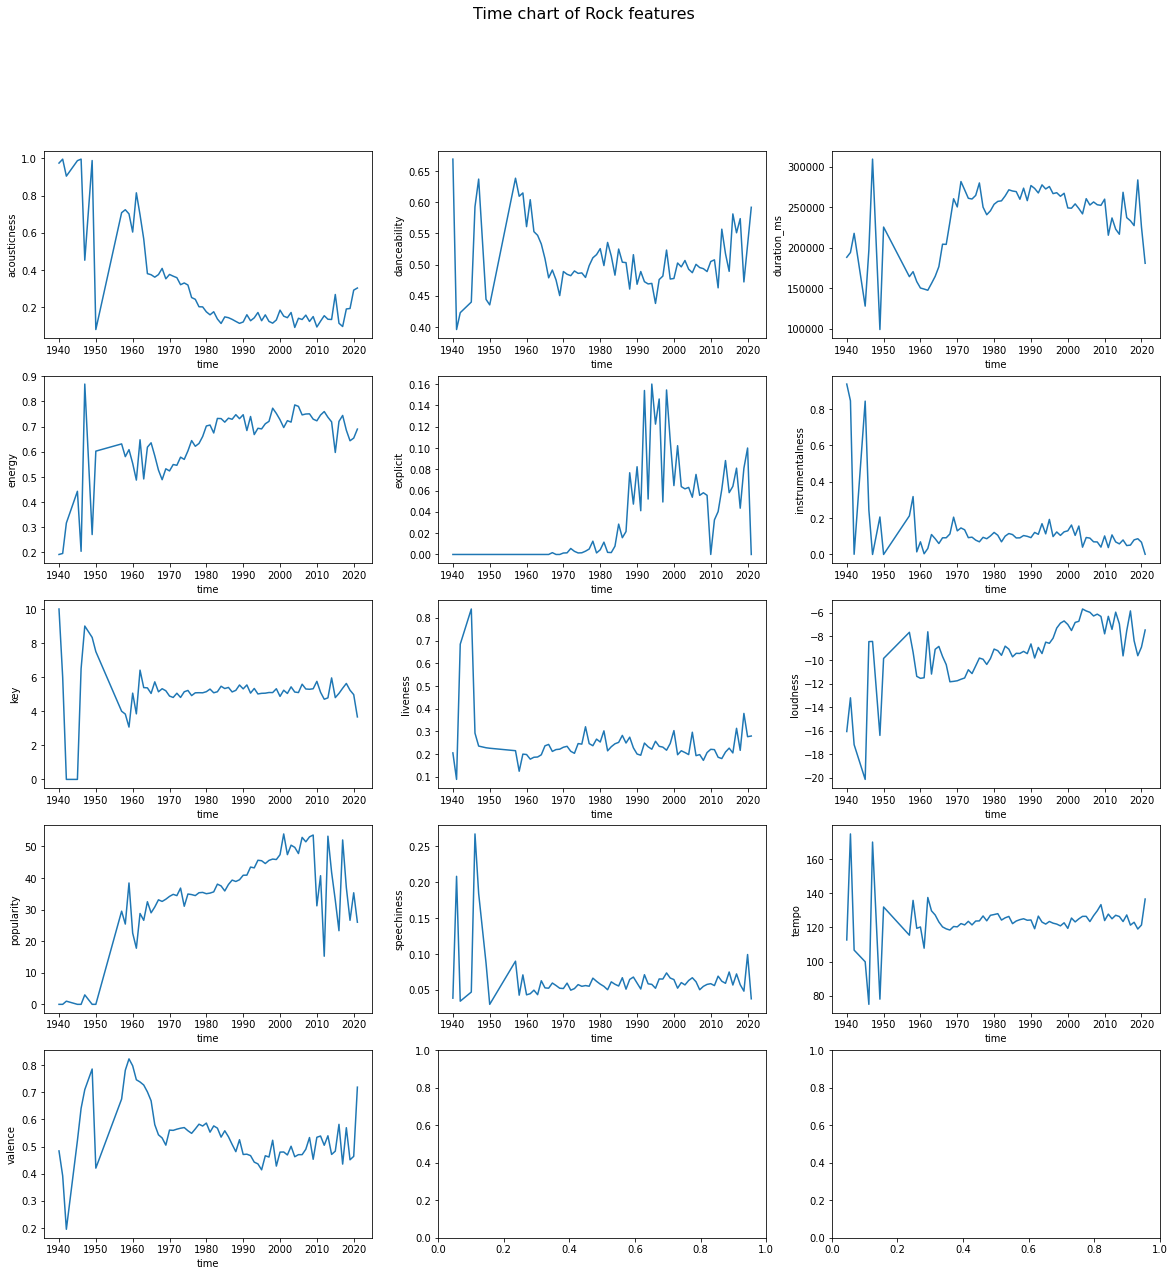

In [ ]:
PlotTemporal_x(data_r, "Rock")

Noticeable reduction in acousticness, instrumentalness, liveness, speechiness and tempo. Observable increase in energy, explicitness, loudness and popularity.

In [ ]:
AdultStandards = merged[ merged.iloc[:,19] == "adult standards" ]
data_A = AdultStandards.groupby(['year']).mean()
data_A.sort_values(by='year', ascending=True)
data_A.head()

,acousticness_x,danceability_x,duration_ms_x,energy_x,explicit,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,popularity_x,speechiness_x,tempo_x,valence_x,freq
year,,,,,,,,,,,,,,,
1920,0.978125,0.345750,175358.250000,0.275563,0.0,0.186499,3.562500,0.276794,-11.978750,0.750000,0.000000,0.059244,107.179563,0.313556,16207.0
1923,0.964433,0.601433,187643.566667,0.244483,0.0,0.339405,5.000000,0.206763,-11.948700,0.866667,8.733333,0.086807,120.509233,0.614500,16207.0
1924,0.939125,0.589375,177898.375000,0.312738,0.0,0.339878,5.500000,0.226500,-12.018750,0.750000,1.500000,0.081875,129.706250,0.641375,16207.0
1925,0.909087,0.524826,202164.956522,0.347802,0.0,0.373294,4.673913,0.394637,-11.884261,0.673913,7.565217,0.109130,123.214674,0.593543,16207.0
1926,0.876143,0.682159,180828.317460,0.212706,0.0,0.275359,3.888889,0.173383,-17.527190,0.809524,11.095238,0.084422,114.390270,0.648984,16207.0


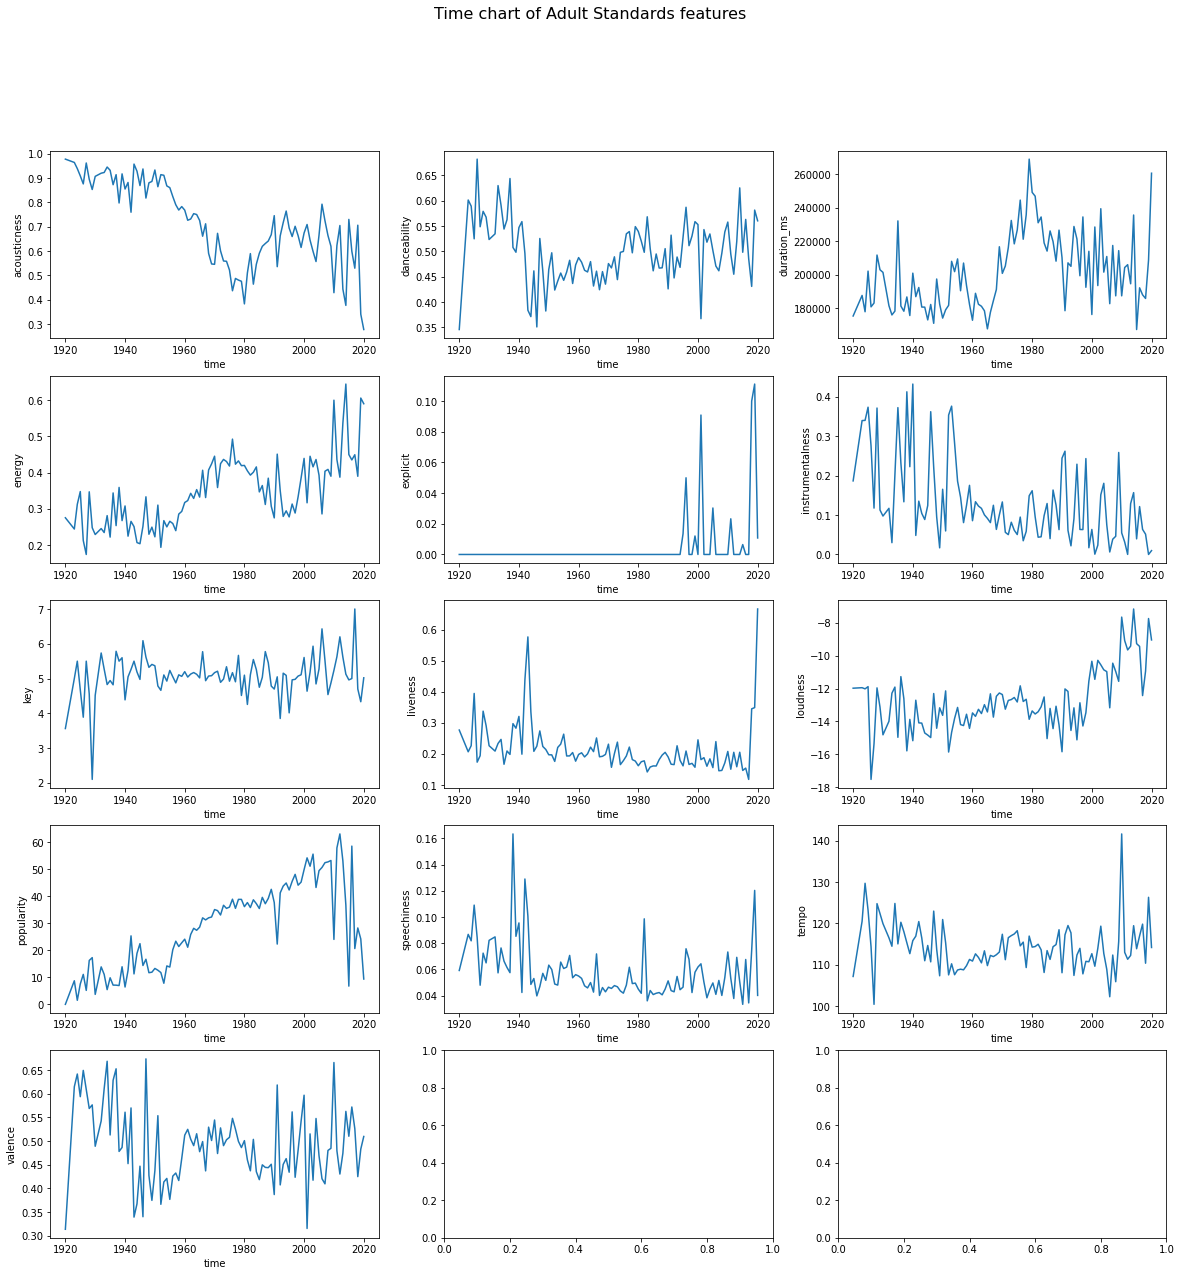

In [ ]:
PlotTemporal_x(data_A, "Adult Standards")

Noticeable increase in energy, explicitness, liveness, loudness, and popularity. Only noticeable decrease in instrumentalness.

In [ ]:
Classical = merged[ merged.iloc[:,19] == "classical" ]
data_c = Classical.groupby(['year']).mean()
data_c.sort_values(by='year', ascending=True)
data_c.head()

,acousticness_x,danceability_x,duration_ms_x,energy_x,explicit,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,popularity_x,speechiness_x,tempo_x,valence_x,freq
year,,,,,,,,,,,,,,,
1920,0.848267,0.315096,526955.600000,0.195880,0.0,0.434605,4.955556,0.210007,-19.581267,0.733333,1.666667,0.043013,107.459800,0.310662,15064.0
1921,0.978304,0.328535,346922.347826,0.147278,0.0,0.557297,4.347826,0.226578,-21.506087,0.739130,0.304348,0.042043,93.229435,0.276578,15064.0
1924,0.931000,0.661000,170973.000000,0.239000,0.0,0.000000,9.000000,0.051100,-13.361000,1.000000,0.000000,0.243000,93.021000,0.901000,15064.0
1925,0.990000,0.355000,168086.000000,0.244000,0.0,0.511000,11.000000,0.502000,-16.149000,1.000000,0.000000,0.094300,72.424000,0.104000,15064.0
1926,0.987170,0.349807,239356.451737,0.136001,0.0,0.833754,5.463320,0.185191,-20.640969,0.667954,0.169884,0.040814,89.547181,0.235305,15064.0


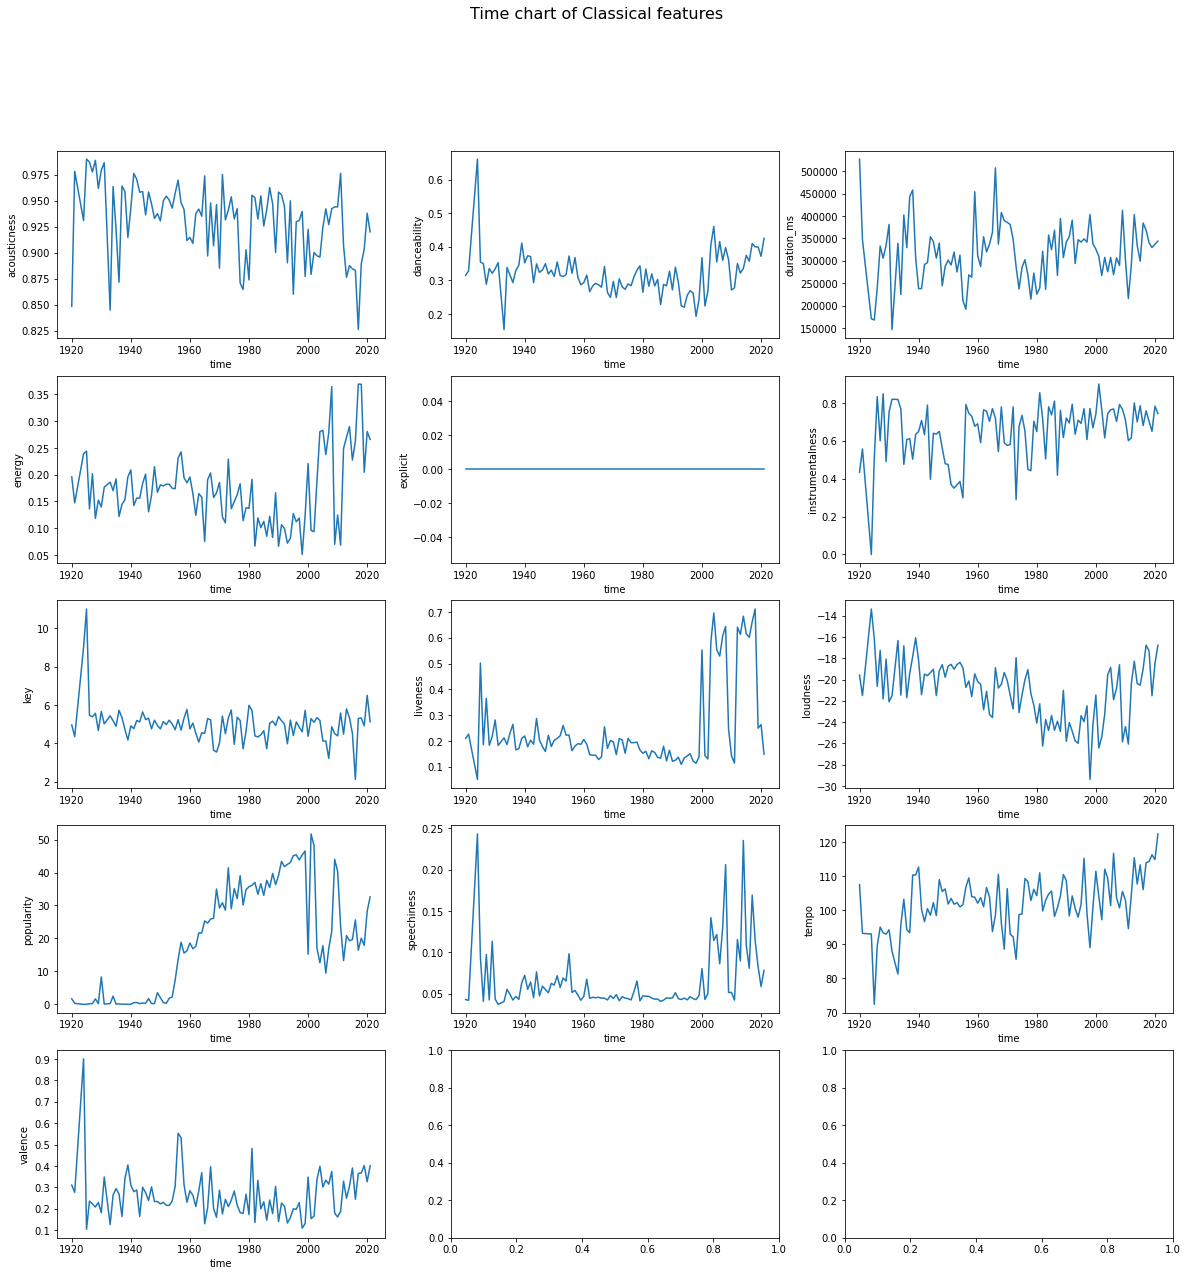

In [ ]:
PlotTemporal_x(data_c, "Classical")

Noticeable reduction in danceability. Increase in energy, liveness and popularity.

In [ ]:
MellowGold = merged[ merged.iloc[:,19] == "mellow gold" ]
data_m = MellowGold.groupby(['year']).mean()
data_m.sort_values(by='year', ascending=True)
data_m.head()

,acousticness_x,danceability_x,duration_ms_x,energy_x,explicit,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,popularity_x,speechiness_x,tempo_x,valence_x,freq
year,,,,,,,,,,,,,,,
1936,0.7540,0.4010,154933.000000,0.285,0.0,0.000000,4.000000,0.3020,-14.598000,1.000000,2.000000,0.033900,121.5500,0.543000,12820.0
1937,0.6590,0.6985,168266.500000,0.267,0.0,0.000000,2.000000,0.1545,-15.400500,1.000000,6.000000,0.049250,121.1645,0.575500,12820.0
1938,0.6170,0.3650,181004.666667,0.396,0.0,0.001003,5.666667,0.2260,-14.055333,0.666667,0.333333,0.042267,121.0410,0.462333,12820.0
1941,0.6385,0.4730,315733.500000,0.405,0.0,0.000000,3.500000,0.1540,-7.278500,0.500000,2.500000,0.039950,97.9215,0.254000,12820.0
1942,0.9040,0.4230,217693.000000,0.317,0.0,0.000955,0.000000,0.6840,-17.196000,1.000000,1.000000,0.034200,106.6760,0.195000,12820.0


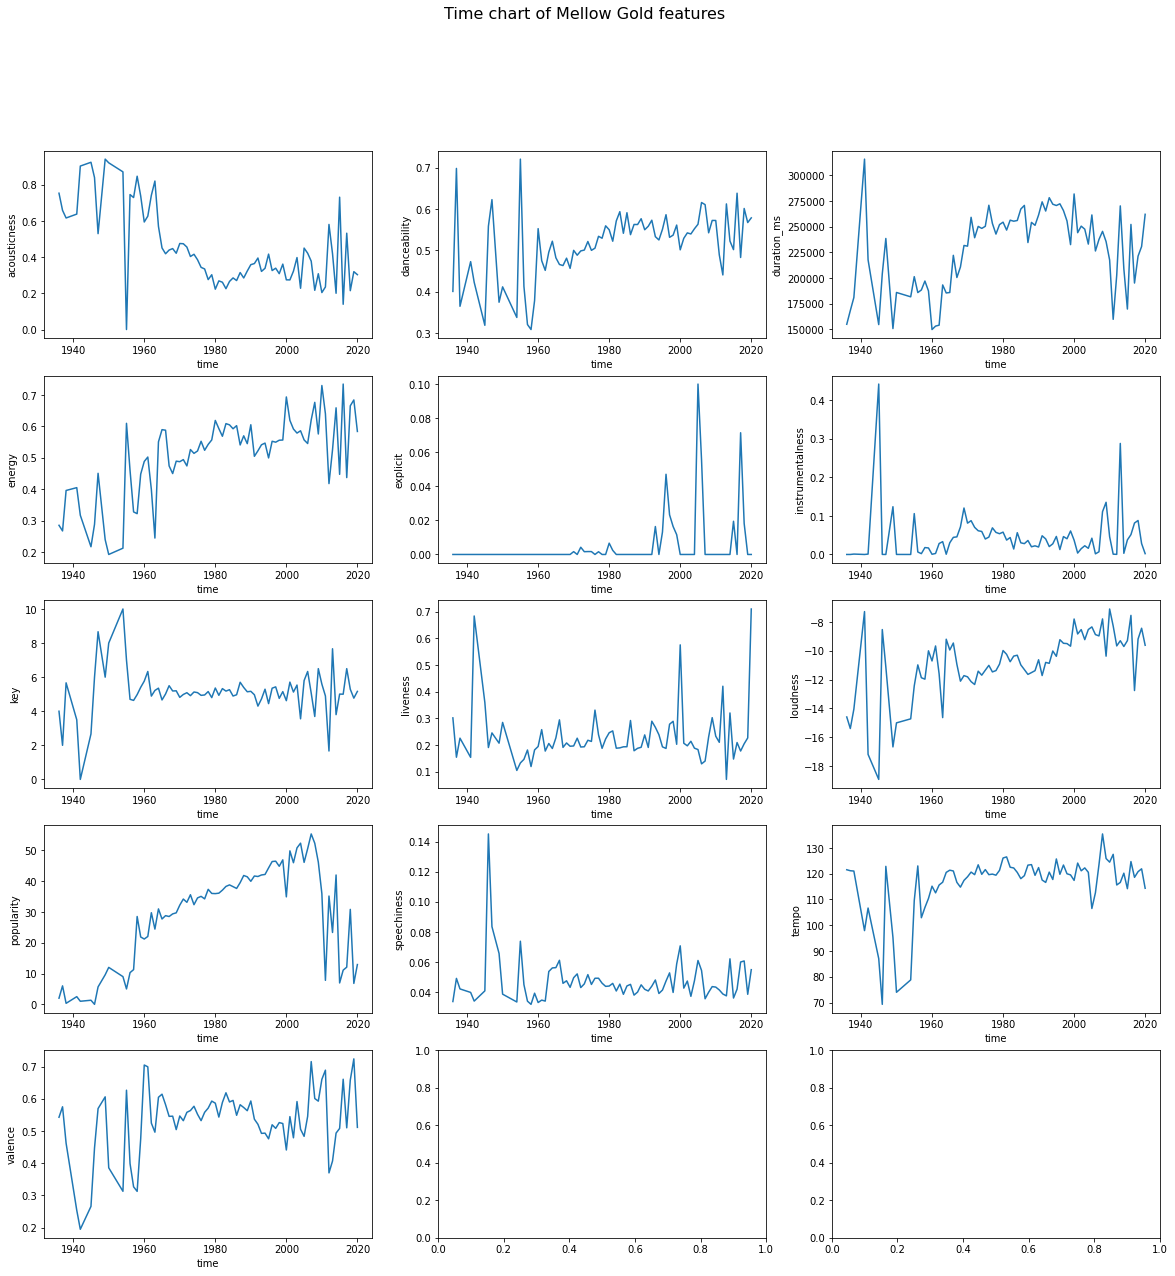

In [ ]:
PlotTemporal_x(data_m,"Mellow Gold")

Reduction in acousticness, instrumentalness, liveness and speechiness. Significant increase in energy, explicitness and popularity.

### Hypothesis Testing


Hypothesis Test: Statistical tests to check how (or if) features contribute to popularity of songs.

**Null Hypothesis ($H_0$)**: Features doesnt influence popularity.



**Alternative Hypothesis ($H_A$)**: Features have an effect on popularity


**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.



---
**First of all we are viusulaizing the data comparing each feature with 
popularity to observe changes.** 

In [ ]:
data = df.sample(n=1000)
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,freq
10354,0.855,Neil Young,0.591,123187,0.221,0,55XOFkEEYgeqxZkQfEt97X,0.001200,7,0.6960,-18.296,1,The Needle and the Damage Done - 2009 Remaster,57,0.0416,105.300,0.3690,1972,163.0
84988,0.100,Burning Spear,0.784,201120,0.534,0,5Isn7QEGxZpBk9aPBeeT7t,0.000168,9,0.0989,-9.898,0,The Invasion,35,0.2050,147.080,0.8560,1975,16.0
88407,0.816,NaN,0.776,258227,0.515,0,1V1NdD15SwBn2kNyAYSOZ5,0.000000,4,0.1880,-8.418,1,Coronita de Flores,47,0.0307,118.805,0.8710,1992,NaN
78792,0.849,Franz Waxman,0.150,595853,0.371,0,4GWfPHWyi1zLoCzEnKmlbz,0.579000,4,0.0943,-12.130,1,"Tristan und Isolde, WWV 90: Liebestod (Arr. fo...",0,0.0360,96.926,0.0485,1942,17.0
152740,0.239,NaN,0.596,196162,0.380,0,0Dp46uUKcVESAiAQ9g3Au6,0.000066,8,0.1140,-13.471,1,"Lord, I Lift Your Name On High",33,0.0260,84.072,0.4520,1989,NaN


We created a sample dataset of size 1000, to ensure it was large enough to be an accurate representation of the data while also remaining small enough that the scatterplot were not just cluttered.

In [ ]:
fstats, p = f_oneway(df[['acousticness', 'danceability', 'duration_ms', 'energy', \
                         'explicit', 'instrumentalness', 'key', 'liveness',         \
                         'loudness','speechiness', 'tempo', 'valence']].values,
                     data[['acousticness', 'danceability', 'duration_ms', 'energy', \
                           'explicit', 'instrumentalness', 'key', 'liveness',         \
                           'loudness','speechiness', 'tempo', 'valence']].values)
siglist = list(p)
features = ['acousticness', 'danceability', 'duration_ms', 'energy', \
            'explicit', 'instrumentalness', 'key', 'liveness',         \
            'loudness','speechiness', 'tempo', 'valence']
res = {features[i]: siglist[i] for i in range(len(features))}
for key, value in res.items():
  if value < 0.05:
    print(key, 'is significantly different from dataframe')

instrumentalness is significantly different from dataframe


Just as a safeguard we ran ANOVA between our sample dataset and the main dataframe to see if there were any significant differences in mean.


#### **Correlational Analysis**

We will be applying correlational analysis on the acousticness with respect to populiraty to get the p-value and check wether we reject the NULL hypothesis or not!

In [ ]:
corrs = df[["acousticness", "danceability", "duration_ms", "energy",
       "explicit", "id", "instrumentalness", "key", "liveness", "loudness",
       "mode", "popularity", "speechiness", "tempo",
       "valence", "year"]].corr()
corrs

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.355561,-0.031550,-0.768911,-0.253613,0.248084,-0.033743,-0.019923,-0.577159,0.078201,-0.448120,-0.049715,-0.239460,-0.229309,-0.628623
danceability,-0.355561,1.000000,-0.148999,0.305967,0.236526,-0.258869,0.031629,-0.091710,0.354043,-0.056850,0.196535,0.265406,0.072847,0.584800,0.214408
duration_ms,-0.031550,-0.148999,1.000000,-0.001408,-0.031201,0.135913,-0.006996,0.006044,-0.027297,-0.031376,-0.004563,-0.088972,-0.035416,-0.218274,0.054533
energy,-0.768911,0.305967,-0.001408,1.000000,0.154746,-0.211104,0.036883,0.128752,0.791170,-0.067189,0.367547,-0.070718,0.276441,0.384706,0.557654
explicit,-0.253613,0.236526,-0.031201,0.154746,1.000000,-0.146843,0.007687,0.024075,0.163966,-0.069779,0.222279,0.314722,0.023809,0.021191,0.206296
instrumentalness,0.248084,-0.258869,0.135913,-0.211104,-0.146843,1.000000,-0.009662,-0.054419,-0.344953,-0.042441,-0.288785,-0.155375,-0.077377,-0.229744,-0.133168
key,-0.033743,0.031629,-0.006996,0.036883,0.007687,-0.009662,1.000000,-0.003254,0.022064,-0.118972,0.004301,0.021425,0.006245,0.027522,0.017756
liveness,-0.019923,-0.091710,0.006044,0.128752,0.024075,-0.054419,-0.003254,1.000000,0.057573,-0.000263,-0.090756,0.126993,0.001864,-0.000795,-0.005562
loudness,-0.577159,0.354043,-0.027297,0.791170,0.163966,-0.344953,0.022064,0.057573,1.000000,-0.029141,0.356238,-0.150671,0.231338,0.370725,0.457070
mode,0.078201,-0.056850,-0.031376,-0.067189,-0.069779,-0.042441,-0.118972,-0.000263,-0.029141,1.000000,-0.011355,-0.042145,-0.005185,0.011185,-0.055491


In [ ]:
df_b  = df
df_b = df_b.drop(["artists","id","name", "freq"], axis=1)
df_b.shape

(220758, 15)

In [ ]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220758 entries, 0 to 174388
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      220758 non-null  float64
 1   danceability      220758 non-null  float64
 2   duration_ms       220758 non-null  int64  
 3   energy            220758 non-null  float64
 4   explicit          220758 non-null  int64  
 5   instrumentalness  220758 non-null  float64
 6   key               220758 non-null  int64  
 7   liveness          220758 non-null  float64
 8   loudness          220758 non-null  float64
 9   mode              220758 non-null  int64  
 10  popularity        220758 non-null  int64  
 11  speechiness       220758 non-null  float64
 12  tempo             220758 non-null  float64
 13  valence           220758 non-null  float64
 14  year              220758 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 26.9 MB


In [ ]:
rho, p_val = stats.spearmanr(df_b) 
#Applied spearman rank correlation coefficient along the entire matrix
p_vals = list(p_val[10])
#p_vals is assigned as a list of the row corresponding to the returned p_values 
#of all other vairables against popularity
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', \
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', \
            'speechiness', 'tempo', 'valence', 'year']
result = {features[i]: p_vals[i] for i in range(len(features))}
#result is now a dictionary with feature name as its key and p_value as its value
for key, value in result.items():
  print(key, '->', value)
#after loop all p_values are printed
print('\n')

for key, value in result.items():
  if value >= 0.05:
    print(key, 'p_value is greater than significance level 0.05,',\
          '\n', 'fail to reject NULL hypothesis, variable seems independent of popularity')

acousticness -> 0.0
danceability -> 0.0
duration_ms -> 0.0
energy -> 0.0
explicit -> 0.0
instrumentalness -> 0.0
key -> 0.12017345634325387
liveness -> 0.0
loudness -> 0.0
mode -> 0.1258586160740784
popularity -> 0.0
speechiness -> 0.0
tempo -> 0.0
valence -> 0.0
year -> 0.0


key p_value is greater than significance level 0.05, 
 fail to reject NULL hypothesis, variable seems independent of popularity
mode p_value is greater than significance level 0.05, 
 fail to reject NULL hypothesis, variable seems independent of popularity




---
As observed all of the p-values of the features except key and mode have a value under 0.05, thus we can reject our NULL hypothesis for those values.

Key has a p_value of approximately 0.12 and mode has a p_value of approximately 0.13, so we fail to reject the NULL hypothesis for both variables cause statistical tests show high possibility of variables being independent from popularity.


#### Feature Variation with Decade of Release (Era)

Statistical tests to check if significant differences exist between different eras of rock music.

**Null Hypothesis ($H_0$)**: No significant difference in features exist between rock songs released in different eras.

**Alternative Hypothesis ($H_A$)**: significant difference in features exist between rock songs released in different eras.

**Significance level($α$)**: We will be using a significance level of 0.05.


We chose to use rock music for our analysis because of its high frequency in our dataset, which gives us a large sample size allowing for the best distribution of data.

In [ ]:
def categorize_decade(year):
  Decade = round(year, -1)
  diff = Decade - year
  if diff > 0:
    Decade = Decade - 10
  return Decade

In [ ]:
merged['decade'] = merged['year'].apply(categorize_decade)
merged.head()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,speechiness_x,tempo_x,valence_x,year,freq,genres,decade
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.634,1920,1536.0,harlem renaissance,1920
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.634,1920,1648.0,traditional blues,1920
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,0.1740,97.600,0.689,1920,1536.0,harlem renaissance,1920
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,0.1740,97.600,0.689,1920,1648.0,traditional blues,1920
2,0.992,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,-12.453,1,Don't You Advertise Your Man,5,0.0592,85.652,0.487,1920,1536.0,harlem renaissance,1920


In [ ]:
rock = merged[ merged.iloc[:,19] == "rock" ]
rock.head()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,speechiness_x,tempo_x,valence_x,year,freq,genres,decade
65475,0.821,Chuck Berry,0.773,160693,0.872,0,3RYwxAkUbHCzCmX8M0C0Zd,0.000016,7,0.109,-5.157,1,School Day (Ring Ring Goes The Bell),50,0.0438,130.948,0.947,1957,20797.0,rock,1950
65476,0.919,Chuck Berry,0.515,137107,0.902,0,2KIz4ileT7mvzFhAR8U5gS,0.000006,3,0.170,-7.085,1,Brown Eyed Handsome Man,38,0.2020,180.070,0.873,1957,20797.0,rock,1950
65477,0.813,Chuck Berry,0.678,174133,0.830,0,0aS1p8fwu06q47zUdShfAv,0.000000,5,0.267,-5.901,0,Too Much Monkey Business,37,0.1280,93.275,0.853,1957,20797.0,rock,1950
65478,0.901,Chuck Berry,0.795,177200,0.610,0,6RpRXXv69SeNcRqScvyd0F,0.000036,0,0.328,-6.063,1,No Money Down,38,0.1830,97.444,0.849,1957,20797.0,rock,1950
65479,0.575,Chuck Berry,0.507,180747,0.627,0,4GWHrdyVTC0AWwuRgoWzE7,0.000000,1,0.198,-7.838,1,Sweet Little Sixteen,54,0.0354,175.309,0.962,1958,20797.0,rock,1950


In [ ]:
#To pick what decades we will be using for analysis
#Going to randomly pick two decades for analysis
#x = rock['decade']
#x = np.unique(x)
#print(random.sample(list(x),3))

We will be looking at 1960, 1980 and 2000 era rock, 

 `decades were gotten from the random decade program written above, future reruns of program might lead to different values, hence cell was converted to comment `

In [ ]:
rock.isna().sum()
#To confirm no missing values in rock

acousticness_x        0
artists               0
danceability_x        0
duration_ms_x         0
energy_x              0
explicit              0
id                    0
instrumentalness_x    0
key_x                 0
liveness_x            0
loudness_x            0
mode_x                0
name                  0
popularity_x          0
speechiness_x         0
tempo_x               0
valence_x             0
year                  0
freq                  0
genres                0
decade                0
dtype: int64

In [ ]:
sample1 = rock[ rock.iloc[:,20] == 1960]
sample1.shape

(3017, 21)

In [ ]:
sample2 = rock[ rock.iloc[:,20] == 1980]
sample2.shape

(5401, 21)

In [ ]:
sample3 = rock[ rock.iloc[:,20] == 2000]
sample3.shape

(1342, 21)

We show example visualizations of how some features differ thorugh the decades with KDE plots.

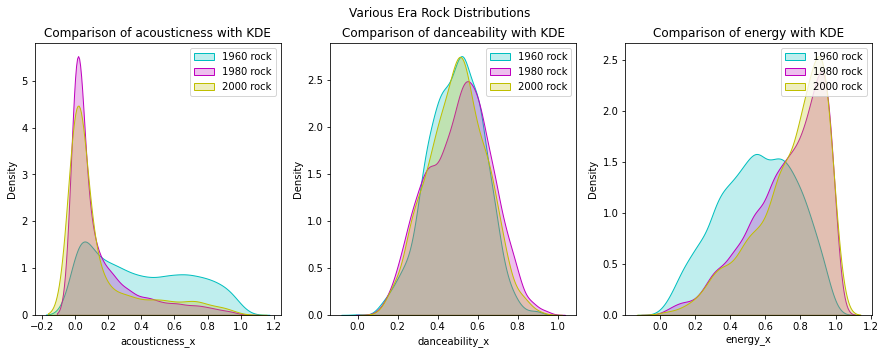

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=False)

#acousticness
sns.kdeplot(sample1['acousticness_x'], shade=True, label="1960 rock", ax=axes[0], color="c")
sns.kdeplot(sample2['acousticness_x'], shade=True, label="1980 rock", ax=axes[0], color="m")
sns.kdeplot(sample3['acousticness_x'], shade=True, label="2000 rock", ax=axes[0], color="y")
axes[0].set_title("Comparison of acousticness with KDE")

#danceability
sns.kdeplot(sample1['danceability_x'], shade=True, label="1960 rock", ax=axes[1], color="c")
sns.kdeplot(sample2['danceability_x'], shade=True, label="1980 rock", ax=axes[1], color="m")
sns.kdeplot(sample3['danceability_x'], shade=True, label="2000 rock", ax=axes[1], color="y")
axes[1].set_title("Comparison of danceability with KDE")

#energy
sns.kdeplot(sample1['energy_x'], shade=True, label="1960 rock", ax=axes[2], color="c")
sns.kdeplot(sample2['energy_x'], shade=True, label="1980 rock", ax=axes[2], color="m")
sns.kdeplot(sample3['energy_x'], shade=True, label="2000 rock", ax=axes[2], color="y")
axes[2].set_title("Comparison of energy with KDE")

plt.suptitle("Various Era Rock Distributions")
leg_0 = axes[0].legend()
leg_1 = axes[1].legend()
leg_2 = axes[2].legend()
plt.show()


In [ ]:
f_stats, p_values = f_oneway(sample1[['acousticness_x', 'danceability_x', 'duration_ms_x', 'energy_x', \
                                      'explicit', 'instrumentalness_x', 'key_x', 'liveness_x',         \
                                      'loudness_x','speechiness_x', 'tempo_x', 'valence_x']].values, 
                             sample2[['acousticness_x', 'danceability_x', 'duration_ms_x', 'energy_x', \
                                      'explicit', 'instrumentalness_x', 'key_x', 'liveness_x',         \
                                      'loudness_x','speechiness_x', 'tempo_x', 'valence_x']].values,                 
                             sample3[['acousticness_x', 'danceability_x', 'duration_ms_x', 'energy_x', \
                                      'explicit', 'instrumentalness_x', 'key_x', 'liveness_x',         \
                                      'loudness_x','speechiness_x', 'tempo_x', 'valence_x']].values)
p_list = list(p_values)
features = ['acousticness_x', 'danceability_x', 'duration_ms_x', 'energy_x', \
            'explicit', 'instrumentalness_x', 'key_x', 'liveness_x',         \
            'loudness_x','speechiness_x', 'tempo_x', 'valence_x']
res = {features[i]: p_list[i] for i in range(len(features))}
for key, value in res.items():
  print(key, '->', value)

print('\n')

for key, value in res.items():
  if value >= 0.05:
    print(key, 'p_value is greater than significance level 0.05, fail to reject NULL hypothesis')

acousticness_x -> 0.0
danceability_x -> 2.919835762650191e-07
duration_ms_x -> 1.0630118559511558e-129
energy_x -> 4.966950476993713e-283
explicit -> 6.469045129542243e-45
instrumentalness_x -> 0.02146769301395451
key_x -> 0.7653618932274646
liveness_x -> 1.2432720372140208e-13
loudness_x -> 1.436677457830329e-239
speechiness_x -> 0.0016526572371937463
tempo_x -> 4.9751726959325175e-09
valence_x -> 1.5129263978665173e-36


key_x p_value is greater than significance level 0.05, fail to reject NULL hypothesis


We reject NULL hypothesis for all features except Key, given that their p_values are lower than our significance level of 0.05 showing that the decade of release has high influence on their distribution. 



Key has a significantly high p_value of 0.76, showing that the feature is probably more dependent on the genre than on the year. 

### Machine Learning

#### PreProcceses

In [ ]:
filename = "data.csv"
df = pd.read_csv(join(path_prefix, filename))
df.head()



,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


Here, we need to play out a fundamental pre-handling step to make it appropriate as a model info.


*   We drop the given columns since we do not need them for our study:
      1.   artists
      2.   explicit
      3.   id
      4.   mode
      5.   name
      6.   release_date





In [ ]:
# drop the name column
df = df.drop(["artists"], axis=1)
df = df.drop(["explicit"], axis=1)
df = df.drop(["id"], axis=1)
df = df.drop(["mode"], axis=1)
df = df.drop(["name"], axis=1)
df = df.drop(["release_date"], axis=1)

df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,0.991000,0.598,168333,0.224,0.000522,5,0.3790,-12.628,12,0.0936,149.976,0.6340,1920
1,0.643000,0.852,150200,0.517,0.026400,5,0.0809,-7.261,7,0.0534,86.889,0.9500,1920
2,0.993000,0.647,163827,0.186,0.000018,0,0.5190,-12.098,4,0.1740,97.600,0.6890,1920
3,0.000173,0.730,422087,0.798,0.801000,2,0.1280,-7.311,17,0.0425,127.997,0.0422,1920
4,0.295000,0.704,165224,0.707,0.000246,10,0.4020,-6.036,2,0.0768,122.076,0.2990,1920


In [ ]:
#Data Partitioning
X = df.drop(columns=['popularity'])
y = df["popularity"].values
# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

#### Feature Selection

In [ ]:
X_train.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

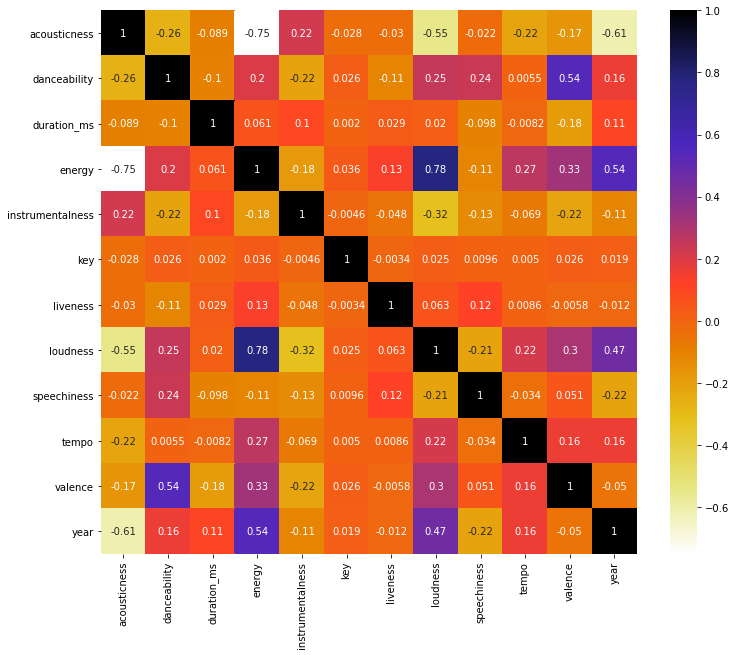

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.85)
corr_features

set()

In [ ]:
from sklearn.feature_selection import f_regression
fregression = f_regression(X_train, y_train)
fregression


(array([2.59860915e+04, 2.18613705e+03, 9.02962639e+01, 1.69146357e+04,
        1.38455949e+04, 5.30510462e-01, 9.22704263e+02, 1.78720482e+04,
        5.52435879e+03, 1.26976362e+03, 5.43638720e+02, 4.96549858e+04]),
 array([0.00000000e+000, 0.00000000e+000, 2.08122883e-021, 0.00000000e+000,
        0.00000000e+000, 4.66393552e-001, 5.21640638e-202, 0.00000000e+000,
        0.00000000e+000, 7.46889173e-277, 5.17722922e-120, 0.00000000e+000]))

In [ ]:
P_values = fregression[1]

In [ ]:
fregression = pd.DataFrame(data=fregression[0], index=X_train.columns, columns=["F values"])
fregression['P_values'] = P_values
fregression = fregression.sort_values(by='F values', ascending=False)
fregression

,F values,P_values
year,49654.985848,0.000000e+00
acousticness,25986.091453,0.000000e+00
loudness,17872.048172,0.000000e+00
energy,16914.635698,0.000000e+00
instrumentalness,13845.594914,0.000000e+00
speechiness,5524.358792,0.000000e+00
danceability,2186.137048,0.000000e+00
tempo,1269.763619,7.468892e-277
liveness,922.704263,5.216406e-202
valence,543.638720,5.177229e-120


In [ ]:
TBD = fregression[ fregression.iloc[:,1]>= 0.05 ]
TBD

,F values,P_values
key,0.53051,0.466394


In [ ]:
X_train = X_train.drop(["key"], axis=1)
X_test = X_test.drop(["key"], axis=1)
X_val = X_val.drop(["key"], axis=1)

#### Regression Model Implementations

##### Linear Regression

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = model.predict(X_val)

In [ ]:
coeff_df = pd.DataFrame(model.coef_, index=X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
acousticness,-8.235797
danceability,-1.658418
duration_ms,-0.000001
energy,-4.360596
instrumentalness,-16.228742
liveness,-8.203984
loudness,0.026006
speechiness,-17.125389
tempo,-0.011637
valence,2.853532


In [ ]:

print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_val, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_val, Y_pred))

Intercept: -601.5270592876717
Mean squared error (MSE): 308.73
Coefficient of determination (R^2): 0.36


##### K-Nearest Neighbors


In [ ]:
# Create KNN classifier
knn = KNeighborsRegressor(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knn.score(X_val, y_val)

0.3051516060435676

##### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# create a model
DTR = DecisionTreeRegressor(criterion="mse")
DTR.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dtr_pred = DTR.predict(X_val)


In [ ]:
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_val, dtr_pred))

Coefficient of determination (R^2): 0.36


##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
regr_pred = regr.predict(X_val)

In [ ]:
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_val, regr_pred))

Coefficient of determination (R^2): 0.43


In [ ]:
regr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

#### Hyper Parameter Tuning

##### K-Nearest Neighbors

In [ ]:
knn_grid = {'n_neighbors': np.arange(3,31,3),
            'weights': ['uniform','distance']}
print(knn_grid)

{'n_neighbors': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30]), 'weights': ['uniform', 'distance']}


In [ ]:
knn_Model = KNeighborsRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_Grid = GridSearchCV(estimator = knn_Model, param_grid = knn_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
knn_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   27.9s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   48.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=4,
             param_grid={'n_neighbors': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
knn_Grid.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [ ]:
print (f'Train Accuracy - : {knn_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {knn_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.998
Test Accuracy - : 0.367


##### Decision Tree

In [ ]:
dt_grid = {'max_depth':[2,4,8,10,12],
           'min_samples_split':[100,200,300,400],
           'max_leaf_nodes' : [50, 100, 150, 200]}

In [ ]:
dt_model = DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
dt_RandomGrid = RandomizedSearchCV(estimator = dt_model, param_distributions = dt_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
dt_RandomGrid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   15.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [ ]:
dt_RandomGrid.best_params_

{'max_depth': 12, 'max_leaf_nodes': 200, 'min_samples_split': 200}

In [ ]:
print (f'Train Accuracy - : {dt_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {dt_RandomGrid.score(X_val,y_val):.3f}')

Train Accuracy - : 0.628
Test Accuracy - : 0.621


##### Random Forest

In [ ]:
rf_grid = {'n_estimators':[10,20,50,100]}

In [ ]:
rf_Model = RandomForestRegressor()

In [ ]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = rf_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  8.2min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  8.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
rf_Grid.best_params_

{'n_estimators': 100}

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_val,y_val):.3f}')

Train Accuracy - : 0.954
Test Accuracy - : 0.684


In [ ]:
scores = [['KNN',knn_Grid.best_score_,knn_Grid.best_params_],['DecisionTree',dt_RandomGrid.best_score_,dt_RandomGrid.best_params_],['Random Forests',rf_Grid.best_score_,rf_Grid.best_params_]]

print(scores)

[['KNN', 0.3280883501500568, {'n_neighbors': 12, 'weights': 'distance'}], ['DecisionTree', 0.6023283275893981, {'min_samples_split': 200, 'max_leaf_nodes': 200, 'max_depth': 12}], ['Random Forests', 0.668060325656699, {'n_estimators': 100}]]


In [ ]:
result = pd.DataFrame(scores,columns=['model','best_score','best_params'])
result

,model,best_score,best_params
0,KNN,0.328088,"{'n_neighbors': 12, 'weights': 'distance'}"
1,DecisionTree,0.602328,"{'min_samples_split': 200, 'max_leaf_nodes': 2..."
2,Random Forests,0.668060,{'n_estimators': 100}




```
# This is formatted as code
```

Based on above, I can conclude that Random Forests with n_estimators=100 is the best model for solving my problem of Song Prediction

#### Song recommendation model

In [ ]:
from sklearn.preprocessing import normalize

data_scaled = normalize(df)

In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)

data_scaled.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,5.886755e-06,0.000004,0.999935,0.000001,3.100793e-09,0.000030,2.251342e-06,-0.000075,0.000071,5.560043e-07,0.000891,3.766098e-06,0.011405
1,4.280608e-06,0.000006,0.999918,0.000003,1.757513e-07,0.000033,5.385711e-07,-0.000048,0.000047,3.554969e-07,0.000578,6.324382e-06,0.012782
2,6.060855e-06,0.000004,0.999931,0.000001,1.074230e-10,0.000000,3.167758e-06,-0.000074,0.000024,1.062023e-06,0.000596,4.205366e-06,0.011719
3,4.098638e-10,0.000002,0.999990,0.000002,1.897693e-06,0.000005,3.032519e-07,-0.000017,0.000040,1.006891e-07,0.000303,9.997835e-08,0.004549
4,1.785334e-06,0.000004,0.999932,0.000004,1.488787e-09,0.000061,2.432896e-06,-0.000037,0.000012,4.647920e-07,0.000739,1.809542e-06,0.011620


In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=10, radius=0.4)
neigh.fit(data_scaled)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=0.4)

Our proposed system pipeline:

if input.size() > 1:

    find its K-Nearest neighbors using:
    reccs = neigh.kneighbors(testsong)
else:
    
    Create a sample and compute the mean for the various features and then use that to evaluate neighbors



